# Section 1

## Install libraries

In [ ]:
!pip install yfinance pandas statsmodels

Import libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## Merge DataFrames on ‘Date’

In [ ]:
def merge_dataframes_on_date(dataframes):
    """
    Merge multiple DataFrames on the 'Date' column.
    Assumes all DataFrames have a 'Date' column.
    """
    if not dataframes:
        return pd.DataFrame()  # Return an empty DataFrame if no dataframes are provided

    merged_df = dataframes[0]  # Start with the first DataFrame
    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on='Date', how='outer')  # Outer join to keep all dates
    return merged_df.set_index('Date')  # Set 'Date' as the index for the final DataFrame

## Fetch Cryptocurrency Data

In [ ]:
def fetch_crypto_data(tickers, start_date, end_date):
    """
    Fetch historical price data for a list of cryptocurrencies.
    Returns a list of DataFrames, each with 'Date' as a column.
    """
    dataframes = []
    for ticker in tickers:
        try:
            print(f"Fetching data for {ticker}...")
            crypto_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
            if not crypto_data.empty:
                # Keep only the 'Close' column and reset index to include 'Date'
                crypto_data = crypto_data[['Close']].reset_index()
                # Rename 'Close' column to the ticker name
                crypto_data.rename(columns={'Close': ticker}, inplace=True)
                dataframes.append(crypto_data)
        except Exception as e:
            print(f"Could not fetch data for {ticker}: {e}")
    return dataframes

## Perform ADF Test

In [ ]:
def adf_test(series):
    """
    Perform the Augmented Dickey-Fuller test on a time series.
    Returns the p-value, test statistic, and critical values.
    """
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    test_stat = result[0]
    critical_values = result[4]
    return p_value, test_stat, critical_values

## Analyze Stationarity

In [ ]:
def analyze_stationarity(data):
    """
    Analyze stationarity for each cryptocurrency in the dataset.
    """
    stationary_pvalue = []
    stationary_teststat = []
    for ticker in data.columns:
        series = data[ticker].dropna()  # Drop missing values for the series
        if len(series) > 0:  # Ensure the series is not empty
            p_value, test_stat, critical_values = adf_test(series)
            # Check stationarity based on p-value
            if p_value < 0.05:
                stationary_pvalue.append((ticker,p_value))
            # Check stationarity based on test statistic
            if test_stat < critical_values['1%']:
                stationary_teststat.append((ticker,p_value, f"{test_stat} < {critical_values['1%']}"))
    return stationary_pvalue, stationary_teststat

## Main Execution Logic

In [ ]:
# Define the top cryptocurrencies (use sample tickers for demonstration)
tickers = [
    "BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "BNB-USD", "SOL-USD", "DOGE-USD", "USDC-USD", "STETH-USD", "ADA-USD",
    "WTRX-USD", "TRX-USD", "AVAX-USD", "WSTETH-USD", "LINK-USD", "TON11419-USD", "SHIB-USD", "WBTC-USD", "SUI20947-USD",
    "WETH-USD", "HBAR-USD", "XLM-USD", "DOT-USD", "BGB-USD", "BCH-USD", "LEO-USD", "LTC-USD", "UNI7083-USD",
    "PEPE24478-USD", "WEETH-USD", "WBETH-USD", "BTCB-USD", "NEAR-USD", "USDE29470-USD", "DAI-USD", "AAVE-USD",
    "APT21794-USD", "ICP-USD", "SUSDE-USD", "POL28321-USD", "CRO-USD", "MNT27075-USD", "ETC-USD",
    "VET-USD", "XMR-USD", "TAO22974-USD", "OM-USD", "ARB11841-USD", "FET-USD", "FIL-USD", "VIRTUAL-USD",
    "OKB-USD", "ALGO-USD", "KAS-USD", "ENA-USD", "JITOSOL-USD", "FTM-USD", "ATOM-USD", "BONK-USD", "OP-USD",
    "STX4847-USD", "IMX10603-USD", "TIA22861-USD", "THETA-USD", "FDUSD-USD", "INJ-USD", "ONDO-USD",
    "GRT6719-USD", "WIF-USD", "JASMY-USD", "SEI-USD", "RETH-USD", "WLD-USD", "RSETH-USD", "RUNE-USD",
    "FLOKI-USD", "LDO-USD", "METH29035-USD", "FLR-USD", "FTN-USD",
    "RAY-USD", "XTZ-USD", "BBTC31369-USD", "GT-USD", "MKR-USD", "SAND-USD", "BEAM28298-USD", "QNT-USD", "PYTH-USD",
    "GALA-USD", "KCS-USD", "WZEDX-USD"
]
# Define the date range
start_date = "2023-12-01"
end_date = "2024-12-01"

# Fetch the data
print("Fetching cryptocurrency data...")
dataframes = fetch_crypto_data(tickers, start_date, end_date)

# Merge all DataFrames on 'Date'
if dataframes:
    merged_data = merge_dataframes_on_date(dataframes)
    print("Merged DataFrame:")
    print(merged_data.head())
else:
    print("No data fetched for the given tickers and date range.")

# Assign the merged data to crypto_data
crypto_data = merged_data
crypto_data.columns = tickers

# Check if data was fetched successfully
if crypto_data.empty:
    print("No data was fetched. Please check the tickers or the date range.")
else:
    # Analyze stationarity
    print("Analyzing stationarity...")
    stationary_pvalue, stationary_teststat = analyze_stationarity(crypto_data)

    # Compare results
    print("\nCryptocurrencies stationary based on p-value and their p-values:")
    print([f"{x[0]} => p-value: {x[1]}" for x in stationary_pvalue])
    print("\nCryptocurrencies stationary based on test statistic and their p-values & their test_stat compare to critical-1%-value:")
    print([f"{x[0]} => p-value: {x[1]}, test_stat compare to 1%-critical_value: {x[2]}" for x in stationary_teststat])

    # All stationary_teststat elements are alson in stationary_pvalue, so the stationary cryptos are stationary_pvalue

Fetching cryptocurrency data...
Fetching data for BTC-USD...
Fetching data for ETH-USD...
Fetching data for USDT-USD...
Fetching data for XRP-USD...
Fetching data for BNB-USD...
Fetching data for SOL-USD...
Fetching data for DOGE-USD...
Fetching data for USDC-USD...
Fetching data for STETH-USD...
Fetching data for ADA-USD...
Fetching data for WTRX-USD...
Fetching data for TRX-USD...
Fetching data for AVAX-USD...
Fetching data for WSTETH-USD...
Fetching data for LINK-USD...
Fetching data for TON11419-USD...
Fetching data for SHIB-USD...
Fetching data for WBTC-USD...
Fetching data for SUI20947-USD...
Fetching data for WETH-USD...
Fetching data for HBAR-USD...
Fetching data for XLM-USD...
Fetching data for DOT-USD...
Fetching data for BGB-USD...
Fetching data for BCH-USD...
Fetching data for LEO-USD...
Fetching data for LTC-USD...
Fetching data for UNI7083-USD...
Fetching data for PEPE24478-USD...
Fetching data for WEETH-USD...
Fetching data for WBETH-USD...
Fetching data for BTCB-USD...


<ipython-input-3-cf8a78411350>:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(merged_df, df, on='Date', how='outer')  # Outer join to keep all dates


Merged DataFrame:
Price            BTC-USD      ETH-USD  USDT-USD   XRP-USD     BNB-USD  \
Ticker           BTC-USD      ETH-USD  USDT-USD   XRP-USD     BNB-USD   
Date                                                                    
2023-12-01  38688.750000  2087.139893  1.000185  0.612915  228.545639   
2023-12-02  39476.332031  2165.704102  1.000364  0.620976  229.300842   
2023-12-03  39978.390625  2193.691650  1.000309  0.623723  228.098206   
2023-12-04  41980.097656  2243.215820  0.999913  0.624374  233.295303   
2023-12-05  44080.648438  2293.841797  1.000546  0.621997  231.261353   

Price         SOL-USD  DOGE-USD  USDC-USD    STETH-USD   ADA-USD  ...  \
Ticker        SOL-USD  DOGE-USD  USDC-USD    STETH-USD   ADA-USD  ...   
Date                                                              ...   
2023-12-01  59.803997  0.083857  0.999797  2080.591797  0.384202  ...   
2023-12-02  63.832859  0.086279  0.999953  2158.363037  0.397798  ...   
2023-12-03  63.039967  0.085615 

# Section 2

## Hurst Exponent

In [ ]:
def calculate_hurst_exponent(prices: pd.Series, max_lag: int = 100) -> float:
    """
    Calculate the Hurst exponent of a time series using rescaled range (R/S) analysis.

    Parameters:
        prices (pd.Series): A Pandas Series of closing prices.
        max_lag (int): The maximum lag to consider for the calculation.

    Returns:
        float: The Hurst exponent.
    """
    # Calculate log returns
    log_prices = np.log(prices)
    log_returns = log_prices.diff().dropna()

    # Ensure max_lag is not greater than half the length of the data
    N = len(log_returns)
    if N < 20:
        return np.nan  # Not enough data to calculate Hurst exponent reliably
    max_lag = min(max_lag, N // 2)

    # Initialize lists to store R/S values and their corresponding lags
    rs_values = []
    valid_lags = []

    for lag in range(2, max_lag):
        # Divide the time series into segments of length "lag"
        segments = [log_returns[i:i + lag] for i in range(0, len(log_returns), lag) if len(log_returns[i:i + lag]) == lag]

        # Skip if no segments are available for this lag
        if len(segments) == 0:
            continue

        # Calculate R/S for each segment
        rs_segment = []
        for segment in segments:
            mean = segment.mean()
            cumulative_deviation = np.cumsum(segment - mean)
            R = cumulative_deviation.max() - cumulative_deviation.min()  # Range
            S = segment.std(ddof=1)  # Sample standard deviation
            if S > 0:
                rs_segment.append(R / S)

        # Average R/S over all segments of this lag
        if len(rs_segment) > 0:
            rs_values.append(np.mean(rs_segment))
            valid_lags.append(lag)

    # Verify that rs_values and valid_lags have sufficient data points
    if len(rs_values) < 2:
        # Not enough data points to perform linear regression
        return np.nan  # Or raise an exception if preferred

    # Perform linear regression on log-log scale to estimate Hurst exponent
    log_lags = np.log(valid_lags)
    log_rs = np.log(rs_values)

    # Fit a linear regression model
    slope, intercept = np.polyfit(log_lags, log_rs, 1)
    hurst_exponent = slope  # Slope of the line

    return hurst_exponent

## Half-life

In [ ]:
def calculate_half_life(series):
    """
    Calculate the half-life of mean reversion for a time series.
    """
    # Clean the series (ensure no NaN or infinite values)
    series = series.replace([np.inf, -np.inf], np.nan).dropna()

    # Calculate lagged series
    lagged_series = series.shift(1).dropna()
    delta_series = series.diff().dropna()

    # Ensure the series lengths match
    if len(lagged_series) != len(delta_series):
        print(f"Series lengths do not match for half-life calculation.")
        return np.nan

    # Perform linear regression (without libraries)
    mean_lagged = lagged_series.mean()
    mean_delta = delta_series.mean()

    # Covariance and variance
    cov = ((lagged_series - mean_lagged) * (delta_series - mean_delta)).sum()
    var = ((lagged_series - mean_lagged) ** 2).sum()

    # Slope (beta)
    slope = cov / var if var > 0 else 0

    # Check if slope is valid
    # if slope <= 0 or slope >= 1:
    #     print(f"Invalid slope for half-life calculation: {slope}")
    #     return np.nan

    # Calculate half-life
    half_life = np.log(2) / np.log(1 - slope)

    return half_life

##  Sort Time Series Based on Hurst Exponent

In [ ]:
def analyze_hurst_and_half_life(data, stationary_pvalue):
    """
    Analyze Hurst exponent and half-life for stationary time series.
    Sort the results based on Hurst exponent in ascending order.
    """
    results = []

    for ticker, _ in stationary_pvalue:
        # Check if the ticker exists in the data
        if ticker not in data.columns:
            print(f"Warning: {ticker} not found in data. Skipping...")
            continue

        # Drop NaN values for the series
        series = data[ticker].dropna()

        # Ensure the series is not empty
        if series.empty:
            print(f"Warning: {ticker} series is empty after dropping NaNs. Skipping...")
            continue

        # Calculate Hurst exponent and half-life
        try:
            hurst = calculate_hurst_exponent(series)
            half_life = calculate_half_life(series)
            results.append((ticker, hurst, half_life))
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
            continue

    # Convert results to a DataFrame for easier sorting and visualization
    results_df = pd.DataFrame(results, columns=["Ticker", "Hurst Exponent", "Half-Life"])
    results_df = results_df.sort_values(by="Half-Life", ascending=True)

    return results_df

## Plot

In [ ]:
def plot_hurst_and_half_life(results_df):
    """
    Plot Hurst exponent and Half-Life separately, sorted by ascending Half-Life.
    """
    # Sort the results by Half-Life in ascending order
    results_df = results_df.sort_values(by="Half-Life", ascending=True)

    # Plot Hurst Exponent
    plt.figure(figsize=(12, 6))
    plt.plot(results_df["Ticker"], results_df["Hurst Exponent"], marker="o", label="Hurst Exponent", color="blue")
    plt.title("Hurst Exponent (Sorted by Half-Life)", fontsize=14)
    plt.xlabel("Cryptocurrency Ticker", fontsize=12)
    plt.ylabel("Hurst Exponent", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)  # Rotate tickers for better readability
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Half-Life
    plt.figure(figsize=(12, 6))
    plt.plot(results_df["Ticker"], results_df["Half-Life"], marker="o", label="Half-Life", color="green")
    plt.title("Half-Life (Sorted by Half-Life)", fontsize=14)
    plt.xlabel("Cryptocurrency Ticker", fontsize=12)
    plt.ylabel("Half-Life", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)  # Rotate tickers for better readability
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Main

<ipython-input-67-411e51a8dfb5>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[0]  # Coefficient of the lagged term


      Ticker  Hurst Exponent  Half-Life
2    DAI-USD        0.379830   0.935732
1   USDC-USD        0.397499   1.121796
3  FDUSD-USD        0.412898   1.853133
0   USDT-USD        0.511875   2.815123


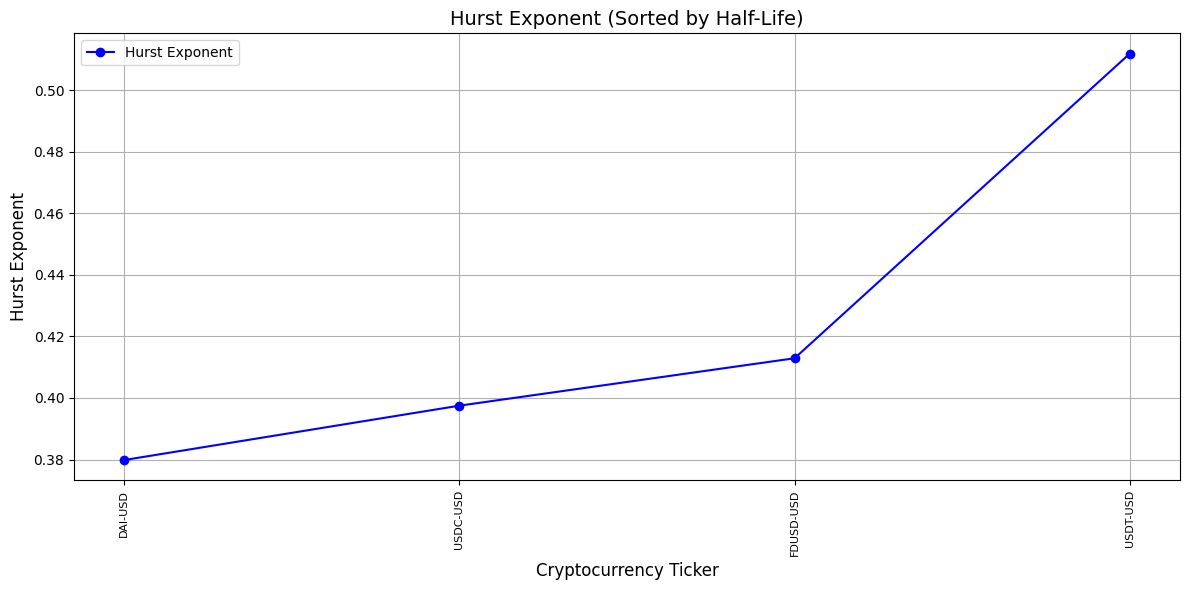

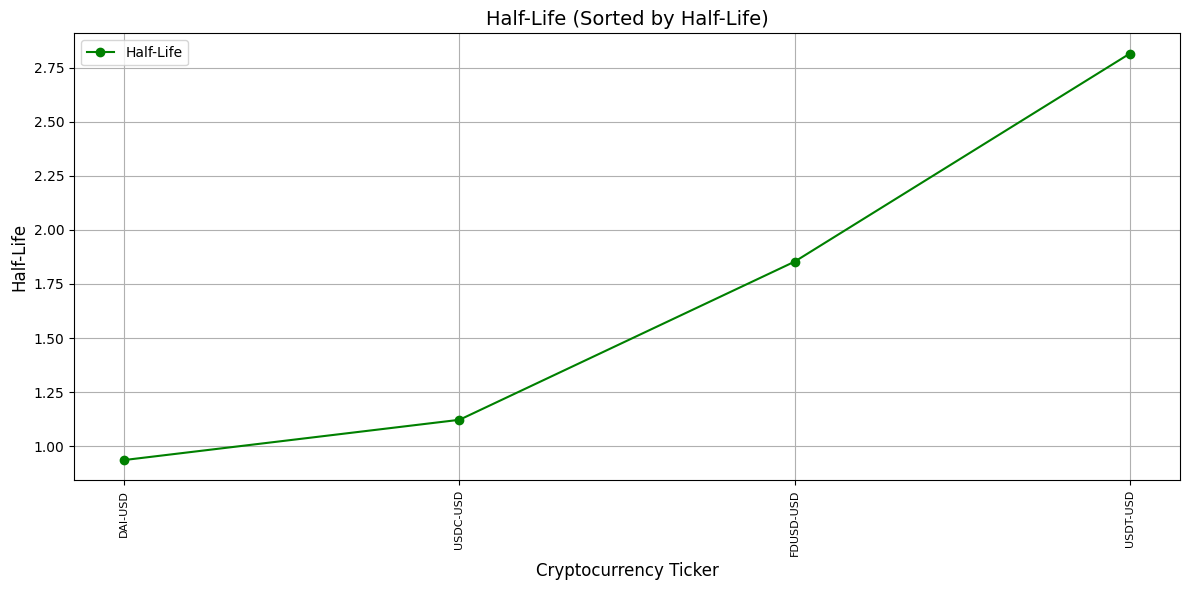

In [ ]:
# Analyze Hurst exponent and half-life for stationary time series
hurst_results = analyze_hurst_and_half_life(crypto_data, stationary_pvalue)

# Display the sorted results
print(hurst_results)

# Plot the relationship between Hurst exponent and half-life
plot_hurst_and_half_life(hurst_results)


<div dir="rtl">

**1. عوامل مشترک در نیمه عمر برای رمزارزهای کمتر مانا**

از تحلیل و نمودارها، عوامل مشترک زیر در میان رمزارزهایی که کمتر مانا به نظر می‌رسند، مشاهده می‌شود:

---

**نیمه عمر طولانی‌تر:**

- **نمودار نیمه عمر** نشان می‌دهد که رمزارزهای کمتر مانا (مثلاً **USDT-USD** و **FDUSD-USD**) در مقایسه با رمزارزهای ماناتر (مثلاً **DAI-USD**) نیمه عمر طولانی‌تری دارند.
- **نیمه عمر طولانی‌تر** نشان‌دهنده بازگشت به میانگین ضعیف‌تر است، به این معنی که قیمت‌ها زمان بیشتری برای بازگشت به میانگین خود نیاز دارند، یا ممکن است اصلاً بازگشت نکنند.

---

**نمایه هِرست بالاتر:**

- **نمودار نمایه هِرست** نشان می‌دهد که رمزارزهای کمتر مانا مقادیر نمایه هِرست بالاتری دارند (مثلاً **USDT-USD** با **𝐻 ≈ 0.51**).
- نمایه هِرست بالاتر رفتار **روندی یا پایدار** را نشان می‌دهد، که با مشاهده نیمه عمرهای طولانی‌تر همخوانی دارد.

---

**بازگشت به میانگین ضعیف‌تر:**

- رمزارزهایی با نیمه عمرهای طولانی‌تر و نمایه هِرست بالاتر، دینامیک‌های **بازگشت به میانگین ضعیف‌تری** نشان می‌دهند، که آن‌ها را کمتر قابل پیش‌بینی و کمتر مانا می‌کند.

---

**2. آنچه نمایه هِرست و نیمه عمر درباره سری‌های قیمتی بیان می‌کنند**

---

**نمایه هِرست:**

نمایه هِرست (**𝐻**) حافظه یا پایداری یک سری زمانی را اندازه‌گیری می‌کند:

- **𝐻 < 0.5**: **رفتار بازگشت به میانگین** (ضد پایدار). قیمت‌ها به میانگین خود بازمی‌گردند، که آن‌ها را برای **استراتژی‌های بازگشت به میانگین** مناسب می‌کند.
- **𝐻 = 0.5**: **رفتار گام تصادفی** (بدون حافظه). قیمت‌ها غیرقابل پیش‌بینی هستند و یک فرآیند تصادفی را دنبال می‌کنند.
- **𝐻 > 0.5**: **رفتار روندی** (پایدار). قیمت‌ها به احتمال بیشتری به حرکت در همان جهت ادامه می‌دهند، که آن‌ها را برای **استراتژی‌های مومنتوم** مناسب می‌کند.

---

**نیمه عمر:**

نیمه عمر سرعت **بازگشت به میانگین** را اندازه‌گیری می‌کند:

- **نیمه عمر کوتاه**: نشان‌دهنده **بازگشت به میانگین قوی** است، جایی که قیمت‌ها به سرعت به میانگین خود بازمی‌گردند. این رمزارزها برای **استراتژی‌های بازگشت به میانگین** ایده‌آل هستند.
- **نیمه عمر طولانی**: نشان‌دهنده **بازگشت به میانگین ضعیف** است، جایی که قیمت‌ها زمان بیشتری برای بازگشت به میانگین خود نیاز دارند. این رمزارزها ممکن است رفتار **روندی یا گام تصادفی** داشته باشند.
- **نیمه عمر نامشخص یا NaN**: نشان‌دهنده **عدم بازگشت به میانگین** است، که اغلب با سری‌های گام تصادفی یا روندی مرتبط است.

---

**3. بینش‌هایی از نمودارها**

---

**نمودار نمایه هِرست:**

- نمودار نشان می‌دهد که با افزایش نیمه عمر (از **DAI-USD** تا **USDT-USD**)، نمایه هِرست نیز افزایش می‌یابد.
- این نشان می‌دهد که رمزارزهایی با نیمه عمرهای طولانی‌تر تمایل دارند نمایه هِرست بالاتری داشته باشند، که بیانگر **مانایی ضعیف‌تر و رفتار روندی بیشتر** است.

---

**نمودار نیمه عمر:**

- نیمه عمر برای رمزارزهای کمتر مانا به طور قابل توجهی افزایش می‌یابد (مثلاً **USDT-USD** طولانی‌ترین نیمه عمر را دارد).
- این تأیید می‌کند که رمزارزهای کمتر مانا زمان بیشتری برای بازگشت به میانگین خود نیاز دارند، یا ممکن است اصلاً بازگشت نکنند.

---

**4. نتیجه‌گیری**

---

- رمزارزهایی با نیمه عمرهای طولانی‌تر و نمایه هِرست بالاتر **کمتر مانا** هستند، **بازگشت به میانگین ضعیف‌تر** نشان می‌دهند، و ممکن است رفتار **روندی یا گام تصادفی** داشته باشند.
- **نمایه هِرست و نیمه عمر** معیارهای مهمی برای درک رفتار سری‌های قیمتی هستند:

  - **نمایه هِرست** تعیین می‌کند که آیا یک سری **بازگشت به میانگین** دارد، **تصادفی** است، یا **روندی** است.
  - **نیمه عمر** سرعت بازگشت به میانگین را کمی می‌کند، که به ارزیابی **قابلیت پیش‌بینی حرکت‌های قیمت** کمک می‌کند.

- این معیارها برای طراحی **استراتژی‌های معاملاتی** حیاتی هستند:

  - **استراتژی‌های بازگشت به میانگین** برای رمزارزهایی با نمایه هِرست پایین و نیمه عمرهای کوتاه **بهترین کارایی** را دارند.
  - **استراتژی‌های مومنتوم** برای رمزارزهایی با نمایه هِرست بالا و نیمه عمرهای طولانی‌تر **مناسب‌تر** هستند.

- **نمودارها** به طور مؤثر این روابط را نشان می‌دهند و برای تحلیل بسیار **مرتبط** هستند.

---
</div>

# Section 3

## Conintegration of non-staionary pairs

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS, add_constant

# Example input: crypto_data (DataFrame with crypto prices), stationary_pvalue (list of stationary cryptos)
# crypto_data: A DataFrame where columns are cryptocurrency tickers and rows are price data.
# stationary_pvalue: A list of tuples [(ticker, p-value), ...] for stationary cryptocurrencies.

def find_cointegrated_pairs(non_stationary_cryptos):
    """
    Find the top 10 cointegrated pairs of non-stationary cryptocurrencies.

    Parameters:
        crypto_data (pd.DataFrame): Time series data for cryptocurrencies.
        stationary_pvalue (list): List of tuples [(ticker, p-value), ...] for stationary cryptocurrencies.

    Returns:
        pd.DataFrame: A DataFrame with the top 10 cointegrated pairs and their p-values.
    """
    # Step 1: Perform the CADF test on all pairs of non-stationary cryptocurrencies
    results = []
    for i, crypto1 in enumerate(non_stationary_cryptos):
        for j, crypto2 in enumerate(non_stationary_cryptos):
            if i < j:  # Avoid duplicate pairs
                # Perform the CADF test
                series1 = crypto_data[crypto1].dropna()
                series2 = crypto_data[crypto2].dropna()

                # Ensure both series have the same length
                min_len = min(len(series1), len(series2))
                series1 = series1[-min_len:]  # Align series to the same length
                series2 = series2[-min_len:]

                # CADF test
                coint_stat, p_value, crit_values = coint(series1, series2)

                # Save the result if p-value < 0.05
                if p_value < 0.05:
                    results.append((crypto1, crypto2, p_value, coint_stat))

    # Step 2: Sort results by p-value and select the top 10 pairs
    results = sorted(results, key=lambda x: x[2])  # Sort by p-value
    top_10_pairs = results[:10]  # Select top 10 pairs

    # Step 3: Calculate coefficients for the top 10 pairs using OLS
    final_results = []
    for crypto1, crypto2, p_value, coint_stat in top_10_pairs:
        # Perform OLS regression
        series1 = crypto_data[crypto1].dropna()
        series2 = crypto_data[crypto2].dropna()

        # Align the series to the same length
        min_len = min(len(series1), len(series2))
        series1 = series1[-min_len:]
        series2 = series2[-min_len:]

        # OLS regression: series2 = beta * series1 + intercept
        X = add_constant(series1)  # Add intercept to the model
        model = OLS(series2, X).fit()
        intercept, beta = model.params

        # Create the combined series (stationary series)
        combined_series = series2 - (intercept + beta * series1)

        # Append the results
        final_results.append({
            "Crypto 1": crypto1,
            "Crypto 2": crypto2,
            "Combined_series": combined_series,
            "P-Value": p_value,
            "Cointegration Statistic": coint_stat,
            "Intercept": intercept,
            "Beta": beta
        })

    # Convert results to a DataFrame
    final_results_df = pd.DataFrame(final_results)
    return final_results_df


### **Step 1: Perform the CADF Test**
- Use the `coint` function from the `statsmodels` library to test for cointegration between all possible pairs of non-stationary cryptocurrencies.
- The `coint` function returns:
  - The test statistic.
  - The p-value for the test.
  - Critical values for the test.
- A pair is considered **cointegrated** if the p-value is less than 0.05 (95% confidence level).

---

### **Step 2: Select the Top 10 Cointegrated Pairs**
- After testing all pairs, sort them by their p-values in ascending order.
- Select the 10 pairs with the **lowest p-values** (indicating the strongest cointegration).

---

### **Step 3: Calculate the Coefficients Using OLS**
- For each of the 10 selected pairs, use the **OLS (Ordinary Least Squares)** model to calculate the coefficients of the linear relationship between the two cryptocurrencies.
- This relationship can be used to create a stationary series from the pair.

---

### **Explanation of the Code**

1. **Step 1: Perform the CADF Test**
   - Use the `coint` function from `statsmodels` to test for cointegration between all pairs of non-stationary cryptocurrencies.
   - Only consider pairs where the p-value is less than 0.05 (95% confidence level).

2. **Step 2: Select the Top 10 Pairs**
   - Sort the pairs by their p-values in ascending order and select the top 10 pairs with the lowest p-values.

3. **Step 3: Calculate OLS Coefficients**
   - For each of the top 10 pairs, fit an OLS regression model to calculate the **intercept** and **beta** of the linear relationship between the two cryptocurrencies.
   - These coefficients can be used to create a stationary series from the pair.

---

### **Output**
The function returns a DataFrame with the following columns:
- **Crypto 1**: The first cryptocurrency in the pair.
- **Crypto 2**: The second cryptocurrency in the pair.
- **Combined_series**: The combined time series of the pair series
- **P-Value**: The p-value from the CADF test.
- **Cointegration Statistic**: The test statistic from the CADF test.
- **Intercept**: The intercept from the OLS regression.
- **Beta**: The slope coefficient from the OLS regression.


In [ ]:
non_stationary_cryptos = list(set(crypto_data) - set(stationary_pvalue))
find_cointegrated_pairs(non_stationary_cryptos)

cointegrated_pairs = find_cointegrated_pairs(non_stationary_cryptos)
print(cointegrated_pairs)


     Crypto 1       Crypto 2  \
0     BTC-USD       BTCB-USD   
1    WTRX-USD        TRX-USD   
2    USDC-USD        ENA-USD   
3    USDC-USD      WZEDX-USD   
4    WETH-USD        ETH-USD   
5  WSTETH-USD      WBETH-USD   
6   WEETH-USD      WBETH-USD   
7    USDC-USD  BBTC31369-USD   
8   WEETH-USD       RETH-USD   
9    RETH-USD      WBETH-USD   

                                     Combined_series       P-Value  \
0  Date
2023-12-01     12.610981
2023-12-02    -4...  0.000000e+00   
1  Date
2023-12-01   -0.000078
2023-12-02    0.00...  0.000000e+00   
2  Date
2024-04-02    0.220590
2024-04-03    0.56...  1.561874e-23   
3  Date
2024-04-11    0.012321
2024-04-12   -0.01...  1.865281e-23   
4  Date
2023-12-01     0.533660
2023-12-02     1....  8.554997e-22   
5  Date
2023-12-01   -0.668038
2023-12-02    4.81...  3.033878e-21   
6  Date
2023-12-13    -7.970746
2023-12-14    49....  5.583453e-20   
7  Date
2024-06-26    -7314.291188
2024-06-27    ...  1.486801e-16   
8  Date
2023-12-1

## Plot

Cointegrated Pairs and Coefficients:
Pair: BTC-USD and BTCB-USD
  P-Value: 0.0000
  Cointegration Statistic: -20.6359
  Intercept: 22.1630
  Beta: 0.9997



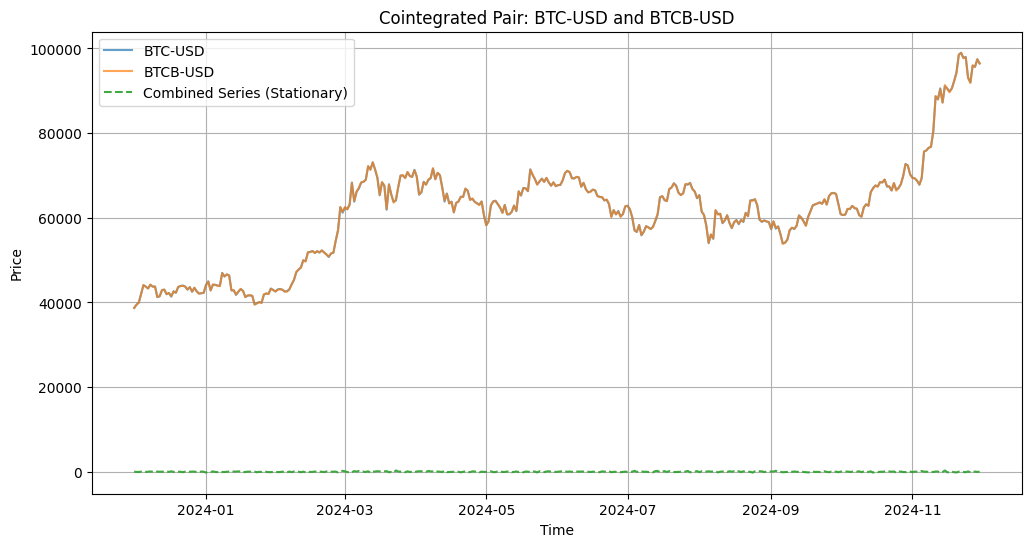

Pair: WTRX-USD and TRX-USD
  P-Value: 0.0000
  Cointegration Statistic: -19.0991
  Intercept: 0.0000
  Beta: 1.0004



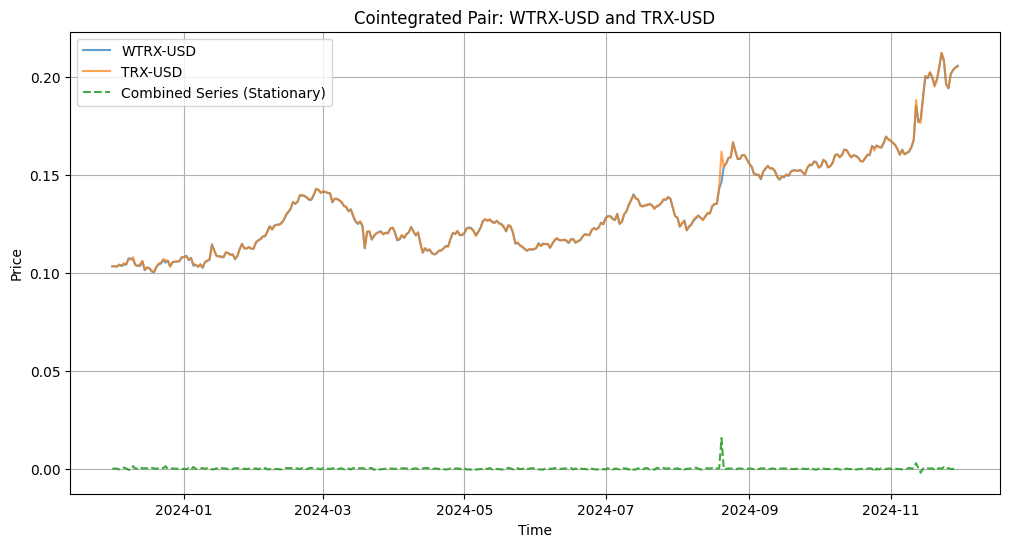

Pair: USDC-USD and ENA-USD
  P-Value: 0.0000
  Cointegration Statistic: -13.1270
  Intercept: -667.9054
  Beta: 668.4713



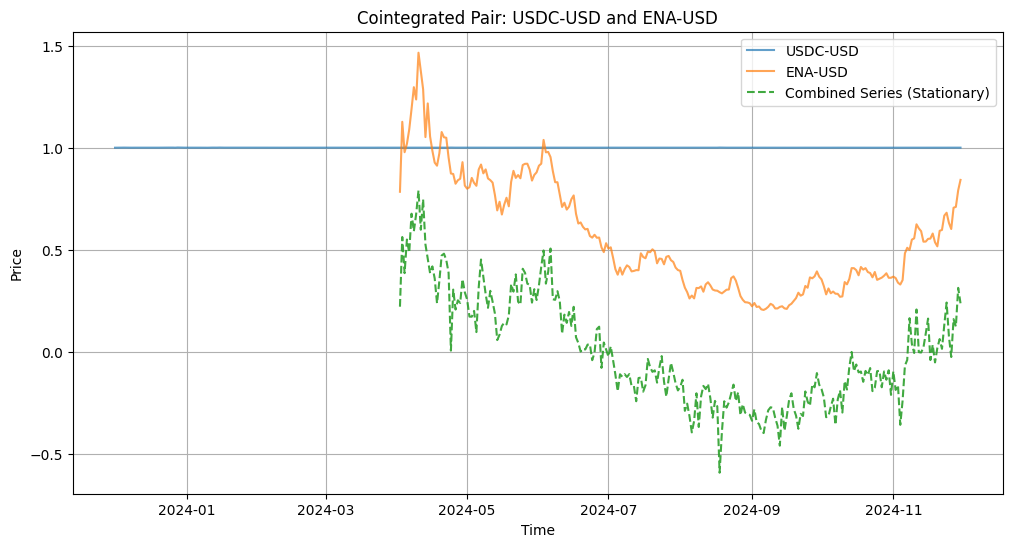

Pair: USDC-USD and WZEDX-USD
  P-Value: 0.0000
  Cointegration Statistic: -13.0883
  Intercept: 50.4496
  Beta: -50.1991



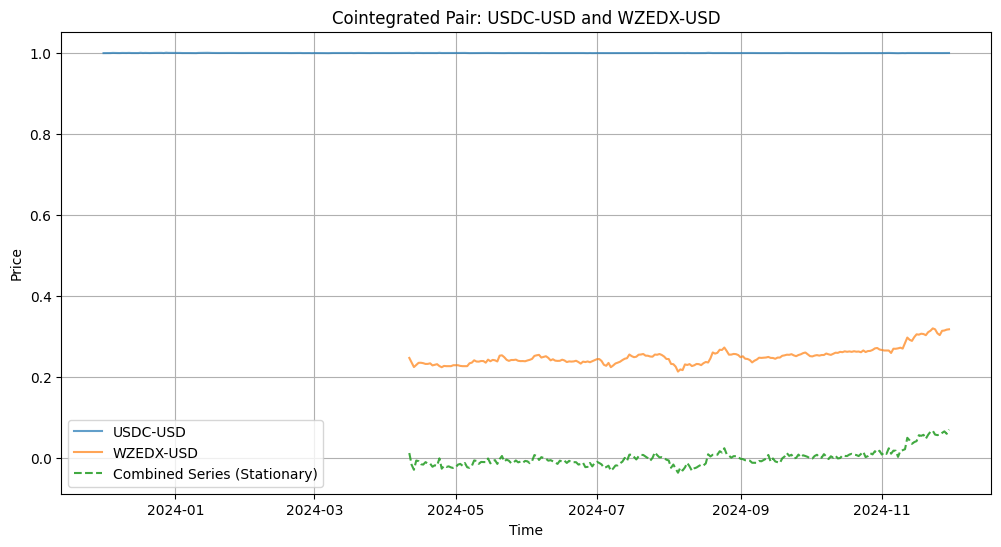

Pair: WETH-USD and ETH-USD
  P-Value: 0.0000
  Cointegration Statistic: -12.2947
  Intercept: -0.4562
  Beta: 1.0000



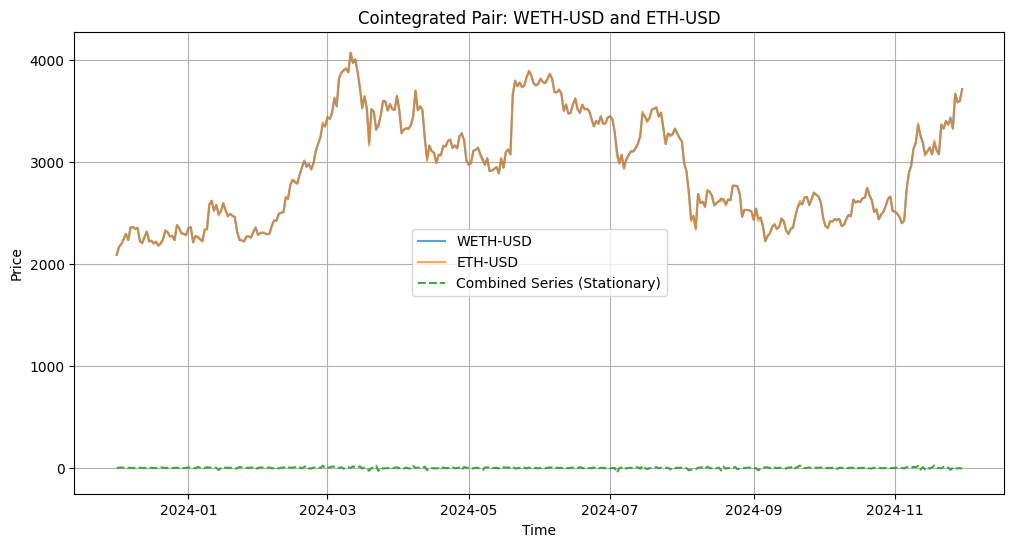

Pair: WSTETH-USD and WBETH-USD
  P-Value: 0.0000
  Cointegration Statistic: -12.0460
  Intercept: -0.7139
  Beta: 0.8908



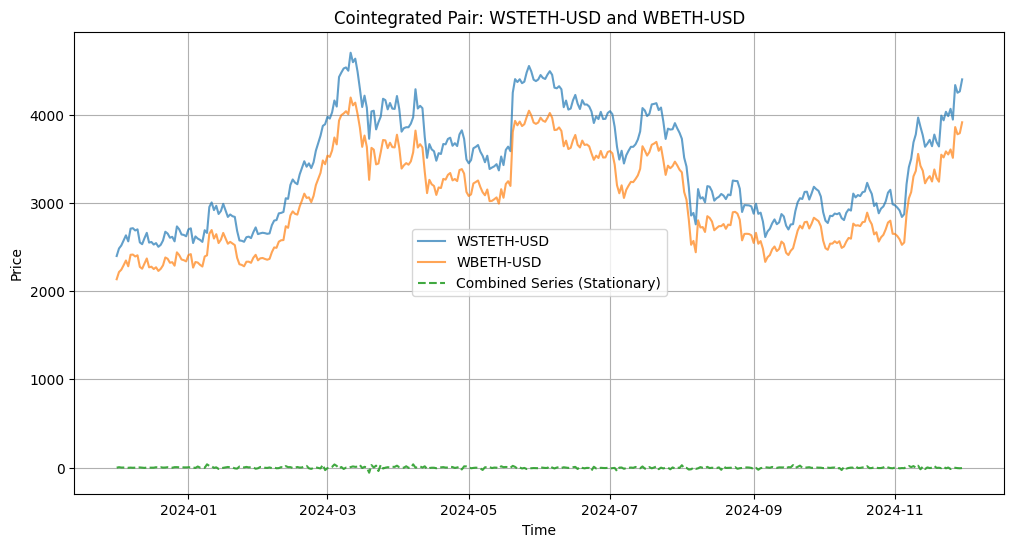

Pair: WEETH-USD and WBETH-USD
  P-Value: 0.0000
  Cointegration Statistic: -11.4935
  Intercept: -1.9562
  Beta: 1.0012



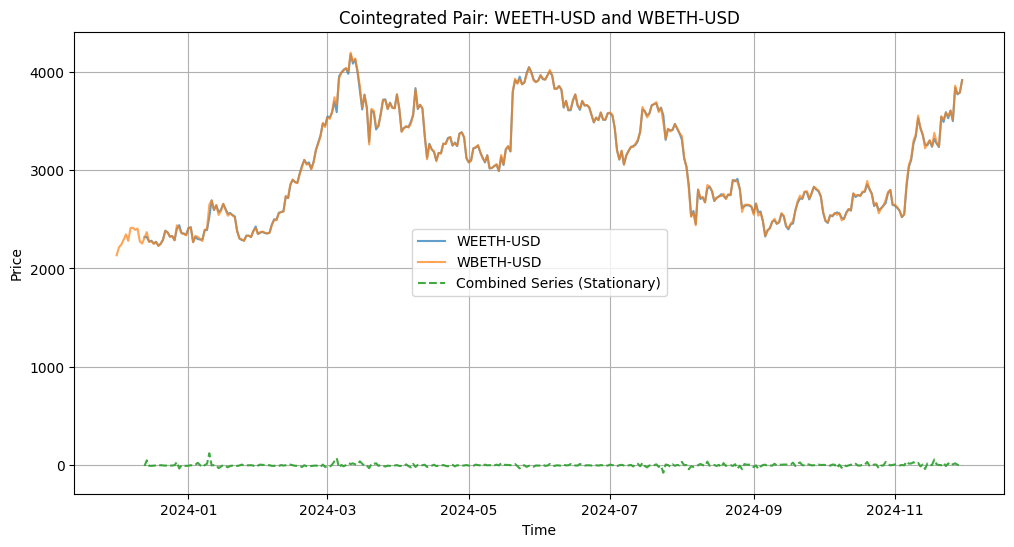

Pair: USDC-USD and BBTC31369-USD
  P-Value: 0.0000
  Cointegration Statistic: -10.0883
  Intercept: 12520439.2734
  Beta: -12454149.1839



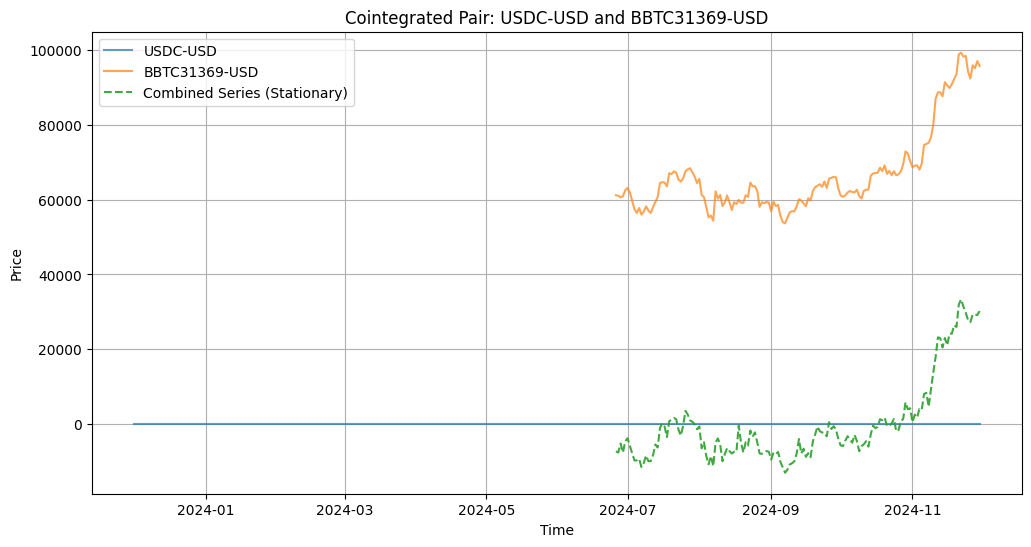

Pair: WEETH-USD and RETH-USD
  P-Value: 0.0000
  Cointegration Statistic: -9.3612
  Intercept: 13.1270
  Beta: 1.0626



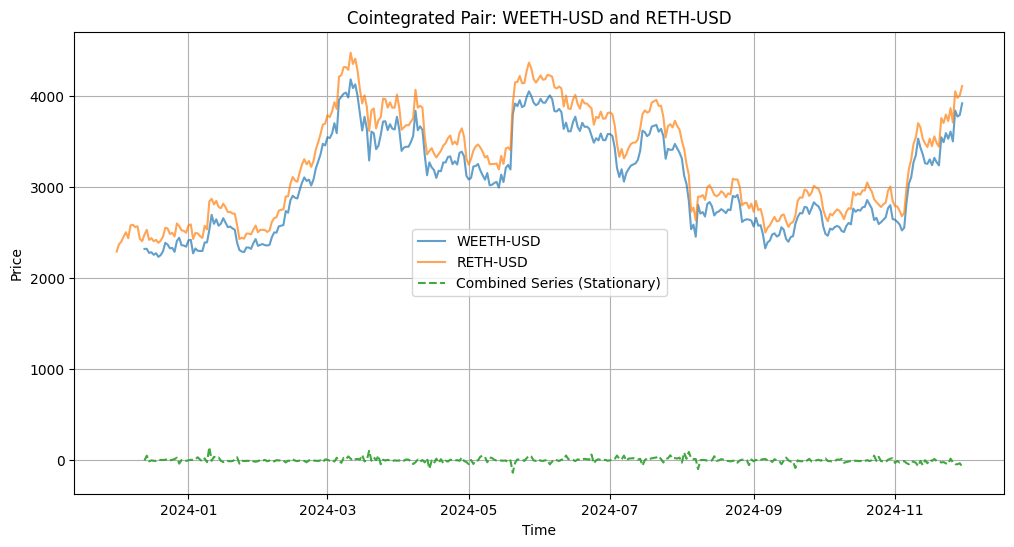

Pair: RETH-USD and WBETH-USD
  P-Value: 0.0000
  Cointegration Statistic: -9.3559
  Intercept: -8.9565
  Beta: 0.9406



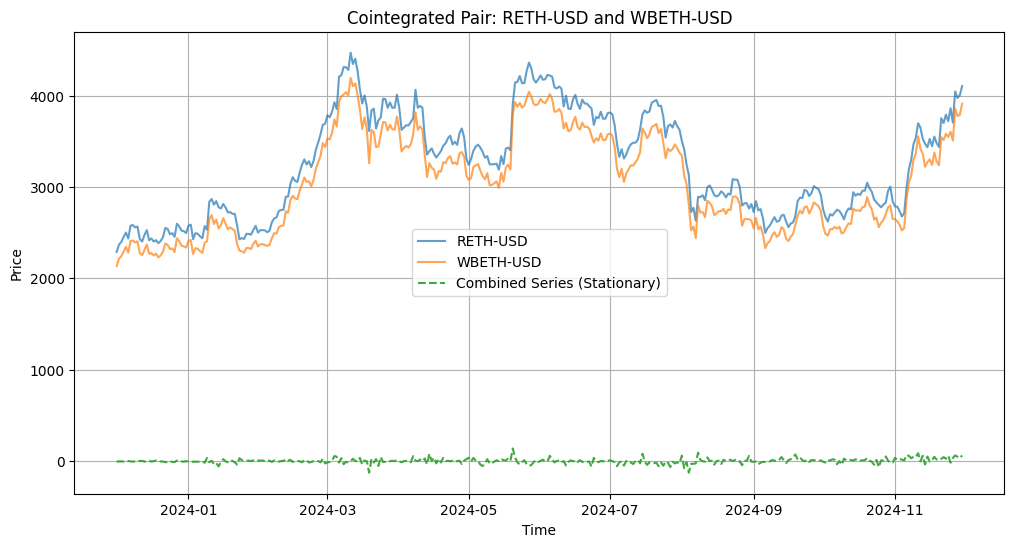

In [ ]:
import matplotlib.pyplot as plt

# Print the coefficients for each cointegrated pair
print("Cointegrated Pairs and Coefficients:")
for index, row in cointegrated_pairs.iterrows():
    print(f"Pair: {row['Crypto 1']} and {row['Crypto 2']}")
    print(f"  P-Value: {row['P-Value']:.4f}")
    print(f"  Cointegration Statistic: {row['Cointegration Statistic']:.4f}")
    print(f"  Intercept: {row['Intercept']:.4f}")
    print(f"  Beta: {row['Beta']:.4f}")
    print()

# Plot the time series for each cointegrated pair
    crypto1 = row['Crypto 1']
    crypto2 = row['Crypto 2']
    intercept = row['Intercept']
    beta = row['Beta']
    combined_series = row['Combined_series']

    # Get the time series data
    series1 = crypto_data[crypto1].dropna()
    series2 = crypto_data[crypto2].dropna()

    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(series1, label=f"{crypto1}", alpha=0.7)
    plt.plot(series2, label=f"{crypto2}", alpha=0.7)
    plt.plot(combined_series, label="Combined Series (Stationary)", linestyle="--", alpha=0.9)
    plt.title(f"Cointegrated Pair: {crypto1} and {crypto2}")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Section 4

## Mean reversion strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def mean_reversion_strategy(combined_series, half_life):
    """
    Apply the mean-reversion trading strategy on a stationary, mean-reverting series.

    Parameters:
        combined_series (pd.Series): The stationary combined series (residuals of cointegrated pair).
        half_life (int): The half-life of the series.

    Returns:
        trades (list): A list of executed trades (entry/exit points).
        pnl (float): The total profit/loss from the strategy.
    """
    # Adjust the look-back period
    look_back_period = max(20, int(np.ceil(half_life / 20.0)) * 20)  # Ensure it's >= 20 and a multiple of half-life

    # Calculate EMA and SD
    ema = combined_series.ewm(span=look_back_period, adjust=False).mean()
    sd = combined_series.rolling(window=look_back_period).std()

    # Initialize variables for tracking positions and trades
    position = 0  # Current position size (positive for buy, negative for sell)
    trades = []  # List to store trade details
    pnl = 0  # Total profit/loss
    entry_price = 0  # Price at which the position was entered

    # Iterate through the time series to apply the strategy
    for t in range(look_back_period, len(combined_series)):
        price = combined_series.iloc[t]
        ema_t = ema.iloc[t]
        sd_t = sd.iloc[t]

        # Entry Conditions
        if price > ema_t + 2 * sd_t:  # Price exceeds 2 SD above EMA
            if position == 0:  # No current position
                position = -0.5  # Enter a half-unit sell position
                entry_price = price
                trades.append((combined_series.index[t], "Sell", price, position))
            elif position == -0.5 and price > ema_t + 3 * sd_t:  # Price exceeds 3 SD above EMA
                position = -1.0  # Add to the sell position
                trades.append((combined_series.index[t], "Sell (Add)", price, position))

        elif price < ema_t - 2 * sd_t:  # Price drops below 2 SD below EMA
            if position == 0:  # No current position
                position = 0.5  # Enter a half-unit buy position
                entry_price = price
                trades.append((combined_series.index[t], "Buy", price, position))
            elif position == 0.5 and price < ema_t - 3 * sd_t:  # Price drops below 3 SD below EMA
                position = 1.0  # Add to the buy position
                trades.append((combined_series.index[t], "Buy (Add)", price, position))

        # Exit Conditions
        elif position < 0 and price < ema_t + 1 * sd_t:  # Close sell position
            pnl += abs(position) * (entry_price - price)  # Profit from the sell position
            trades.append((combined_series.index[t], "Sell Exit", price, position))
            position = 0  # Close position

        elif position > 0 and price > ema_t - 1 * sd_t:  # Close buy position
            pnl += abs(position) * (price - entry_price)  # Profit from the buy position
            trades.append((combined_series.index[t], "Buy Exit", price, position))
            position = 0  # Close position

    return trades, pnl

## Explanation

This function, `plot_trade_signals`, is designed to **visualize the results of a mean-reversion trading strategy** by plotting the price series, Exponential Moving Average (EMA), Standard Deviation (SD) bands, trade signals, and shaded areas for sell zones. It provides a clear and intuitive way to analyze the strategy's performance.

---

### **Step-by-Step Explanation**

#### **Function Parameters**
```python
def plot_trade_signals(combined_series, ema, sd, trades, title="Mean-Reversion Strategy"):
```
1. **`combined_series`**:
   - A `pandas.Series` object containing the stationary combined series (residuals of the cointegrated pair).
   - This represents the price deviations from the mean and is the main input for the strategy.

2. **`ema`**:
   - The Exponential Moving Average (EMA) of the `combined_series`, used as the "mean" in the mean-reversion strategy.

3. **`sd`**:
   - The Standard Deviation (SD) of the `combined_series`, used to calculate the upper and lower bands for the strategy.

4. **`trades`**:
   - A list of executed trades, where each trade is a tuple containing:
     - `t`: The timestamp of the trade.
     - `action`: The type of trade (e.g., "Buy", "Sell", "Buy Exit", "Sell Exit").
     - `price`: The price at which the trade occurred.
     - `position`: The position size (e.g., -0.5 for a half-unit sell position).

5. **`title`**:
   - A string specifying the title of the plot. Defaults to `"Mean-Reversion Strategy"`.

---

### **1. Create the Plot**
```python
plt.figure(figsize=(12, 6))
```
- A new figure is created with a size of 12x6 inches.

---

### **2. Plot the Price Series**
```python
plt.plot(combined_series.index, combined_series, label="Price", color="blue", alpha=0.7)
```
- The **`combined_series`** is plotted as a blue line.
- The `alpha=0.7` makes the line slightly transparent for better visualization.

---

### **3. Plot the EMA**
```python
plt.plot(ema.index, ema, label="EMA", color="orange", linewidth=2)
```
- The **Exponential Moving Average (EMA)** is plotted as an orange line.
- The `linewidth=2` makes the line thicker for emphasis.

---

### **4. Plot the SD Bands**
```python
plt.plot(ema.index, ema + 1 * sd, label="1 * SD", color="purple", linestyle="dotted")
plt.plot(ema.index, ema - 1 * sd, color="purple", linestyle="dotted")
plt.plot(ema.index, ema + 2 * sd, label="2 * SD", color="green", linestyle="dashed")
plt.plot(ema.index, ema - 2 * sd, color="green", linestyle="dashed")
plt.plot(ema.index, ema + 3 * sd, label="3 * SD", color="red", linestyle="dashdot")
plt.plot(ema.index, ema - 3 * sd, color="red", linestyle="dashdot")
```
- The **SD bands** are plotted around the EMA:
  - \( \text{EMA} \pm 1\text{SD} \): Purple dotted lines.
  - \( \text{EMA} \pm 2\text{SD} \): Green dashed lines.
  - \( \text{EMA} \pm 3\text{SD} \): Red dash-dot lines.
- These bands represent the thresholds for the strategy:
  - \( \pm 2\text{SD} \) and \( \pm 3\text{SD} \) are used for entry conditions.
  - \( \pm 1\text{SD} \) is used for exit conditions.

---

### **5. Highlight the Sell Zones**
```python
plt.fill_between(ema.index, ema + 2 * sd, ema + 3 * sd, color="red", alpha=0.2, label="Sell Zone")
plt.fill_between(ema.index, ema + 3 * sd, combined_series.max(), color="red", alpha=0.3, label="Full Sell Zone")
```
- **Sell Zone**:
  - The area between \( \text{EMA} + 2\text{SD} \) and \( \text{EMA} + 3\text{SD} \) is shaded in light red (`alpha=0.2`).
  - This zone indicates where the price is high enough to trigger a **sell signal**.
- **Full Sell Zone**:
  - The area above \( \text{EMA} + 3\text{SD} \) is shaded in darker red (`alpha=0.3`).
  - This zone indicates where the price is extremely high, triggering additional sell signals.

---

### **6. Plot Trade Signals**
```python
for trade in trades:
    t, action, price, position = trade
    if "Sell" in action:
        plt.scatter(t, price, color="red", label="Sell Signal" if "Sell Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
        plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="red")
    elif "Buy" in action:
        plt.scatter(t, price, color="green", label="Buy Signal" if "Buy Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
        plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="green")
```
- **For Each Trade**:
  - The trade's timestamp (`t`) and price (`price`) are used to plot the signal.
  - If the trade is a **sell** (e.g., "Sell" or "Sell Exit"):
    - A red scatter point is plotted at the trade's time and price.
    - A label (e.g., "Sell Signal") is added near the point using `annotate`.
  - If the trade is a **buy** (e.g., "Buy" or "Buy Exit"):
    - A green scatter point is plotted at the trade's time and price.
    - A label (e.g., "Buy Signal") is added near the point using `annotate`.
- **Avoid Duplicate Labels**:
  - The `if "Sell Signal" not in plt.gca().get_legend_handles_labels()[1]` condition ensures that "Sell Signal" and "Buy Signal" are only added to the legend once.

---

### **7. Add Labels, Title, and Legend**
```python
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
```
- **Title**:
  - The plot's title is set using the `title` parameter.
- **Axis Labels**:
  - The x-axis is labeled as "Time".
  - The y-axis is labeled as "Price".
- **Legend**:
  - A legend is added to explain the plot elements (price, EMA, SD bands, trade signals, etc.).
- **Grid**:
  - A grid is added to make the plot easier to read.

---

### **Summary of the Plot**
The plot includes:
1. **Price Series**: The combined series (residuals of the cointegrated pair).
2. **EMA**: The smoothed average of the series.
3. **SD Bands**: Thresholds for trade entry and exit.
4. **Shaded Zones**: Sell zones for extreme price deviations.
5. **Trade Signals**: Markers and annotations for buy/sell trades.

---

Let me know if you need further clarification or additional enhancements!

# Section 5

## Plot

In [ ]:
def plot_trade_signals(combined_series, ema, sd, trades, title="Mean-Reversion Strategy"):
    """
    Plot the price series, EMA, SD bands, trade signals, and shaded areas for the strategy.

    Parameters:
        combined_series (pd.Series): The stationary combined series (residuals of cointegrated pair).
        ema (pd.Series): Exponential Moving Average of the series.
        sd (pd.Series): Standard Deviation of the series.
        trades (list): List of executed trades (entry/exit points).
        title (str): Title of the plot.
    """
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot the price series
    plt.plot(combined_series.index, combined_series, label="Price", color="blue", alpha=0.7)

    # Plot the EMA
    plt.plot(ema.index, ema, label="EMA", color="orange", linewidth=2)

    # Plot the SD bands
    plt.plot(ema.index, ema + 1 * sd, label="1 * SD", color="purple", linestyle="dotted")
    plt.plot(ema.index, ema - 1 * sd, color="purple", linestyle="dotted")
    plt.plot(ema.index, ema + 2 * sd, label="2 * SD", color="green", linestyle="dashed")
    plt.plot(ema.index, ema - 2 * sd, color="green", linestyle="dashed")
    plt.plot(ema.index, ema + 3 * sd, label="3 * SD", color="red", linestyle="dashdot")
    plt.plot(ema.index, ema - 3 * sd, color="red", linestyle="dashdot")

    # Highlight the sell zones
    plt.fill_between(ema.index, ema + 2 * sd, ema + 3 * sd, color="red", alpha=0.2, label="Sell Zone")
    plt.fill_between(ema.index, ema + 3 * sd, combined_series.max(), color="red", alpha=0.3, label="Full Sell Zone")

    # Plot trade signals
    for trade in trades:
        t, action, price, position = trade
        if "Sell" in action:
            plt.scatter(t, price, color="red", label="Sell Signal" if "Sell Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
            plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="red")
        elif "Buy" in action:
            plt.scatter(t, price, color="green", label="Buy Signal" if "Buy Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
            plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="green")

    # Add labels, title, and legend
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()


## Explanation

### **Function Overview**
The function takes the following inputs:
- **`combined_series`**: The stationary combined series (residuals of the cointegrated pair). This represents the price deviations from the mean.
- **`ema`**: The Exponential Moving Average (EMA) of the `combined_series`, which acts as the "mean" in the mean-reversion strategy.
- **`sd`**: The Standard Deviation (SD) of the `combined_series`, used to calculate the upper and lower bands for the strategy.
- **`trades`**: A list of executed trades, where each trade is a tuple containing:
  - `t`: The timestamp of the trade.
  - `action`: The type of trade (e.g., "Buy", "Sell", "Buy Exit", "Sell Exit").
  - `price`: The price at which the trade occurred.
  - `position`: The position size (e.g., -0.5 for a half-unit sell position).
- **`title`**: A string for the plot's title (default is `"Mean-Reversion Strategy"`).

The function outputs a **plot** showing:
1. The price series (`combined_series`).
2. The EMA.
3. SD bands (\( \text{EMA} \pm 1\text{SD}, \text{EMA} \pm 2\text{SD}, \text{EMA} \pm 3\text{SD} \)).
4. Shaded areas for sell zones.
5. Markers for trade signals (buy/sell points).

---

### **Step-by-Step Explanation**

#### **1. Create the Plot**
```python
plt.figure(figsize=(12, 6))
```
- Creates a new figure with a size of 12x6 inches for the plot.

---

#### **2. Plot the Price Series**
```python
plt.plot(combined_series.index, combined_series, label="Price", color="blue", alpha=0.7)
```
- Plots the **price series** (`combined_series`) as a blue line.
- The `alpha=0.7` makes the line slightly transparent for better visualization.

---

#### **3. Plot the EMA**
```python
plt.plot(ema.index, ema, label="EMA", color="orange", linewidth=2)
```
- Plots the **Exponential Moving Average (EMA)** as an orange line.
- The `linewidth=2` makes the line thicker for emphasis.

---

#### **4. Plot the SD Bands**
```python
plt.plot(ema.index, ema + 1 * sd, label="1 * SD", color="purple", linestyle="dotted")
plt.plot(ema.index, ema - 1 * sd, color="purple", linestyle="dotted")
plt.plot(ema.index, ema + 2 * sd, label="2 * SD", color="green", linestyle="dashed")
plt.plot(ema.index, ema - 2 * sd, color="green", linestyle="dashed")
plt.plot(ema.index, ema + 3 * sd, label="3 * SD", color="red", linestyle="dashdot")
plt.plot(ema.index, ema - 3 * sd, color="red", linestyle="dashdot")
```
- Plots the **SD bands** around the EMA:
  - \( \text{EMA} \pm 1\text{SD} \): Purple dotted lines.
  - \( \text{EMA} \pm 2\text{SD} \): Green dashed lines.
  - \( \text{EMA} \pm 3\text{SD} \): Red dash-dot lines.
- These bands represent the thresholds for the strategy:
  - \( \pm 2\text{SD} \) and \( \pm 3\text{SD} \) are used for entry conditions.
  - \( \pm 1\text{SD} \) is used for exit conditions.

---

#### **5. Highlight the Sell Zones**
```python
plt.fill_between(ema.index, ema + 2 * sd, ema + 3 * sd, color="red", alpha=0.2, label="Sell Zone")
plt.fill_between(ema.index, ema + 3 * sd, combined_series.max(), color="red", alpha=0.3, label="Full Sell Zone")
```
- **Sell Zone**:
  - The area between \( \text{EMA} + 2\text{SD} \) and \( \text{EMA} + 3\text{SD} \) is shaded in light red (`alpha=0.2`).
  - This zone indicates where the price is high enough to trigger a **sell signal**.
- **Full Sell Zone**:
  - The area above \( \text{EMA} + 3\text{SD} \) is shaded in darker red (`alpha=0.3`).
  - This zone indicates where the price is extremely high, triggering additional sell signals.

---

#### **6. Plot Trade Signals**
```python
for trade in trades:
    t, action, price, position = trade
    if "Sell" in action:
        plt.scatter(t, price, color="red", label="Sell Signal" if "Sell Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
        plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="red")
    elif "Buy" in action:
        plt.scatter(t, price, color="green", label="Buy Signal" if "Buy Signal" not in plt.gca().get_legend_handles_labels()[1] else "", zorder=5)
        plt.annotate(action, (t, price), textcoords="offset points", xytext=(-15, 10), ha='center', color="green")
```

- **For Each Trade**:
  - Extracts the trade details (`t`, `action`, `price`, `position`) from the `trades` list.
  - If the trade is a **sell** (e.g., "Sell" or "Sell Exit"):
    - A red scatter point is plotted at the trade's time (`t`) and price (`price`).
    - A label (e.g., "Sell Signal") is added near the point using `annotate`.
  - If the trade is a **buy** (e.g., "Buy" or "Buy Exit"):
    - A green scatter point is plotted at the trade's time (`t`) and price (`price`).
    - A label (e.g., "Buy Signal") is added near the point using `annotate`.

- **Avoid Duplicate Labels**:
  - The condition `if "Sell Signal" not in plt.gca().get_legend_handles_labels()[1]` ensures that "Sell Signal" and "Buy Signal" are only added to the legend once.

---

#### **7. Add Labels, Title, and Legend**
```python
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
```
- **Title**:
  - The plot's title is set using the `title` parameter.
- **Axis Labels**:
  - The x-axis is labeled as "Time".
  - The y-axis is labeled as "Price".
- **Legend**:
  - A legend is added to explain the plot elements (price, EMA, SD bands, trade signals, etc.).
- **Grid**:
  - A grid is added to make the plot easier to read.

---

### **Expected Output**

The plot will include:
1. **Price Series**: The combined series (residuals of the cointegrated pair).
2. **EMA**: The smoothed average of the series.
3. **SD Bands**: Thresholds for trade entry and exit.
4. **Shaded Zones**: Sell zones for extreme price deviations.
5. **Trade Signals**:
   - Red downward-pointing triangles for sell signals.
   - Green upward-pointing triangles for buy signals.
   - Labels like "Sell" or "Buy Exit" near the markers.

---

### **Example Walkthrough**

#### **Inputs**
- **`combined_series`**: A stationary series of residuals.
- **`ema`**: The EMA of the `combined_series`.
- **`sd`**: The rolling standard deviation of the `combined_series`.
- **`trades`**: A list of trades, e.g.:
  ```python
  trades = [
      (pd.Timestamp("2023-01-01"), "Buy", 100, 0.5),
      (pd.Timestamp("2023-01-10"), "Sell", 110, -0.5)
  ]
  ```
- **`title`**: `"Mean-Reversion Strategy for BTC-USD & ETH-USD"`.

#### **Output**
A plot showing:
- The price series and EMA.
- SD bands (\( \pm 1\text{SD}, \pm 2\text{SD}, \pm 3\text{SD} \)).
- Shaded sell zones.
- Buy/sell signals with annotations.


## Sharpe ratio

In [ ]:
def calculate_sharpe_ratio(strategy_returns, risk_free_rate=0):
    """
    Calculate the Sharpe Ratio for the strategy.

    Parameters:
        strategy_returns (pd.Series): The percentage returns of the strategy.
        risk_free_rate (float): The risk-free rate of return (default is 0).

    Returns:
        float: The Sharpe Ratio.
    """
    # Calculate the excess returns (strategy returns - risk-free rate)
    excess_returns = strategy_returns - risk_free_rate

    # Calculate the Sharpe Ratio
    sharpe_ratio = excess_returns.mean() / excess_returns.std()

    # Annualize the Sharpe Ratio if the returns are daily
    sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)  # Assuming 252 trading days in a year

    return sharpe_ratio_annualized

## Explanation

### **Purpose**
The `calculate_sharpe_ratio` function computes the **Sharpe Ratio**, which measures the **risk-adjusted return** of a trading strategy. It tells us how much return the strategy generates for each unit of risk (volatility).

---

### **Step-by-Step Explanation**

1. **Inputs**:
   - **`strategy_returns`**: A `pandas.Series` containing the **percentage returns** of the strategy for each time period (e.g., daily returns).
   - **`risk_free_rate`**: The risk-free rate of return (default is 0). This represents the return of a risk-free investment (e.g., U.S. Treasury bonds). If not provided, it is assumed to be 0.

2. **Calculate Excess Returns**:
   ```python
   excess_returns = strategy_returns - risk_free_rate
   ```
   - The **excess returns** are the returns of the strategy minus the risk-free rate. This isolates the returns attributable to the strategy's risk-taking.

3. **Calculate the Sharpe Ratio**:
   ```python
   sharpe_ratio = excess_returns.mean() / excess_returns.std()
   ```
   - The Sharpe Ratio is the **mean of the excess returns** divided by their **standard deviation**.
   - **Mean of Excess Returns**: Measures the average return generated by the strategy above the risk-free rate.
   - **Standard Deviation of Excess Returns**: Measures the volatility (risk) of the strategy's returns.

4. **Annualize the Sharpe Ratio**:
   ```python
   sharpe_ratio_annualized = sharpe_ratio * np.sqrt(252)
   ```
   - The Sharpe Ratio is annualized by multiplying it by \( \sqrt{252} \), assuming there are 252 trading days in a year.
   - This allows for comparison with other strategies or benchmarks on an annualized basis.

5. **Return the Sharpe Ratio**:
   - The function returns the **annualized Sharpe Ratio**.

---

### **Output**
The Sharpe Ratio is a single number that indicates the risk-adjusted performance of the strategy:
- A **higher Sharpe Ratio** is better, as it indicates the strategy generates more return per unit of risk.
- Typical benchmarks:
  - **1.0**: Good.
  - **2.0**: Very good.
  - **3.0 or higher**: Excellent.

---

### **Example Walkthrough**

#### **Example Inputs**
Suppose the strategy generates the following daily returns:
```python
strategy_returns = pd.Series([0.01, -0.005, 0.02, 0.015, -0.01])  # Example daily returns
```

#### **Sharpe Ratio Calculation**
1. **Mean of Returns**:
   \[
   \text{Mean} = \frac{0.01 - 0.005 + 0.02 + 0.015 - 0.01}{5} = 0.006
   \]

2. **Standard Deviation of Returns**:
   \[
   \text{Standard Deviation} = \sqrt{\frac{\sum(\text{return} - \text{mean})^2}{n - 1}}
   \]

3. **Sharpe Ratio**:
   \[
   \text{Sharpe Ratio} = \frac{\text{Mean}}{\text{Standard Deviation}}
   \]

4. **Annualized Sharpe Ratio**:
   Multiply the Sharpe Ratio by \( \sqrt{252} \).

#### **Equity Curve Calculation**
1. **Cumulative Returns**:
   \[
   \text{Equity Curve} = (1 + \text{returns}).\text{cumprod()}
   \]

2. **Plot**:
   - The curve will show the growth of capital over time based on the strategy's returns.

## Plot equity

In [ ]:
def plot_equity_curve(strategy_returns, pair_name):
    """
    Plot the Equity Curve for the strategy.

    Parameters:
        strategy_returns (pd.Series): The percentage returns of the strategy.
        pair_name (str): The name of the cointegrated pair.
    """
    # Calculate the Equity Curve (cumulative returns)
    equity_curve = (1 + strategy_returns).cumprod()  # Compound returns

    # Plot the Equity Curve
    plt.figure(figsize=(12, 6))
    plt.plot(equity_curve.index, equity_curve, label="Equity Curve", color="blue", linewidth=2)
    plt.title(f"Equity Curve for {pair_name}")
    plt.xlabel("Time")
    plt.ylabel("Cumulative Returns")
    plt.grid()
    plt.legend()
    plt.show()

## Explanation

### **1. `plot_equity_curve` Function**

### **Purpose**
The `plot_equity_curve` function is used to **visualize the cumulative performance** of a trading strategy over time. It shows how the strategy's capital grows or shrinks based on the returns generated by the strategy.

---

### **Step-by-Step Explanation**

1. **Inputs**:
   - **`strategy_returns`**: A `pandas.Series` containing the **percentage returns** of the strategy for each time period (e.g., daily returns).
   - **`pair_name`**: A string representing the name of the cointegrated pair (e.g., "BTC-USD & ETH-USD"). This is used in the plot title.

2. **Calculate the Equity Curve**:
   ```python
   equity_curve = (1 + strategy_returns).cumprod()
   ```
   - The **Equity Curve** is calculated as the cumulative product of \( 1 + \text{returns} \). This simulates the compounding growth of the strategy's capital over time.
   - For example:
     - If the first return is 1% (\( 0.01 \)), the capital grows by \( 1 + 0.01 = 1.01 \).
     - If the second return is -2% (\( -0.02 \)), the capital becomes \( 1.01 \times (1 - 0.02) = 0.9898 \).
   - The cumulative product reflects how the strategy's capital changes over time based on its performance.

3. **Plot the Equity Curve**:
   ```python
   plt.plot(equity_curve.index, equity_curve, label="Equity Curve", color="blue", linewidth=2)
   ```
   - The equity curve is plotted as a blue line.
   - The x-axis represents time (from the index of `strategy_returns`).
   - The y-axis represents the cumulative returns (starting at 1.0, which represents 100% of the initial capital).

4. **Customize the Plot**:
   ```python
   plt.title(f"Equity Curve for {pair_name}")
   plt.xlabel("Time")
   plt.ylabel("Cumulative Returns")
   plt.grid()
   plt.legend()
   plt.show()
   ```
   - The title includes the name of the cointegrated pair.
   - Labels for the x-axis ("Time") and y-axis ("Cumulative Returns") make the plot easier to interpret.
   - A grid is added for better readability.

---

### **Output**
The plot shows the cumulative growth of the strategy's capital over time. If the strategy is profitable, the curve will trend upward. If the strategy performs poorly, the curve will trend downward.


## Run Strategy

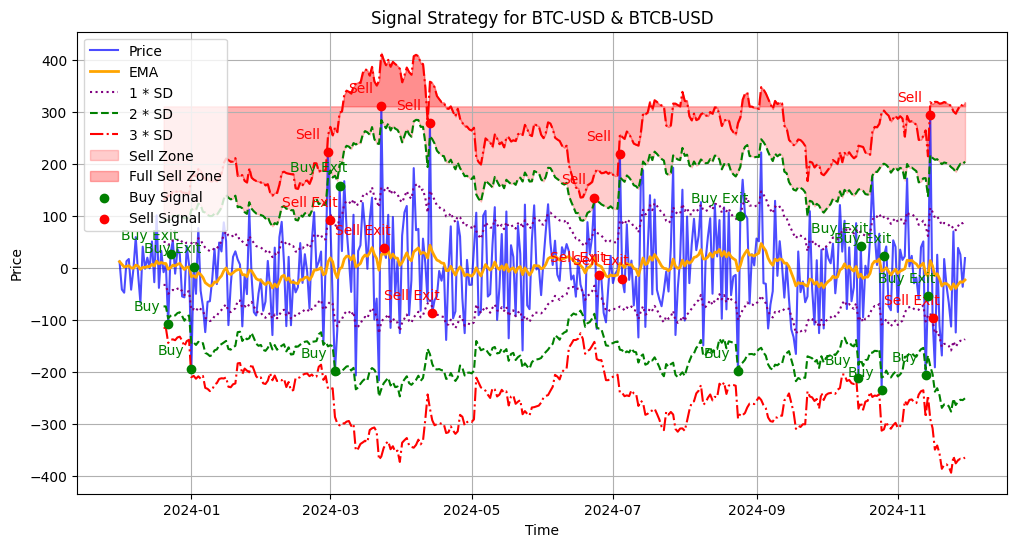

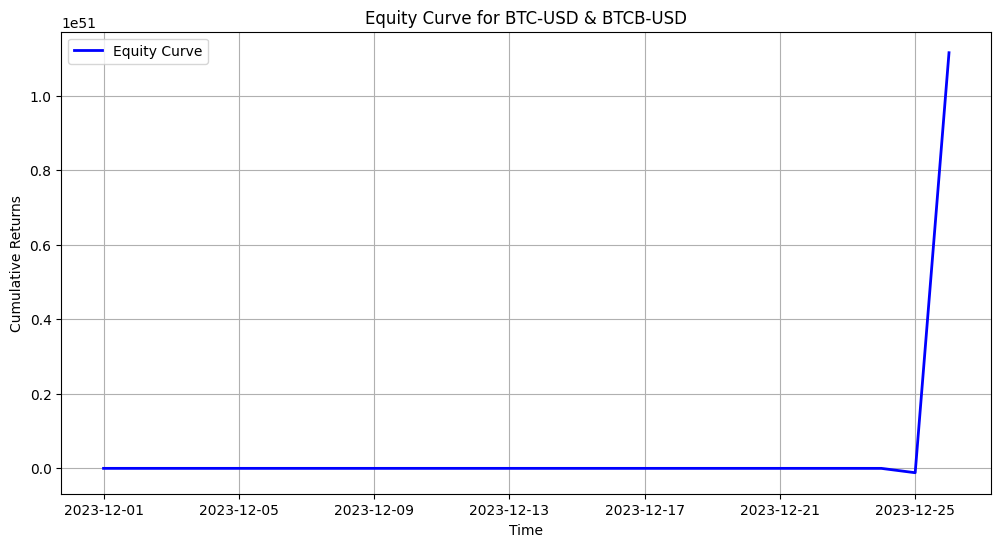


Sharpe Ratio for BTC-USD & BTCB-USD is 1.2052845680217883




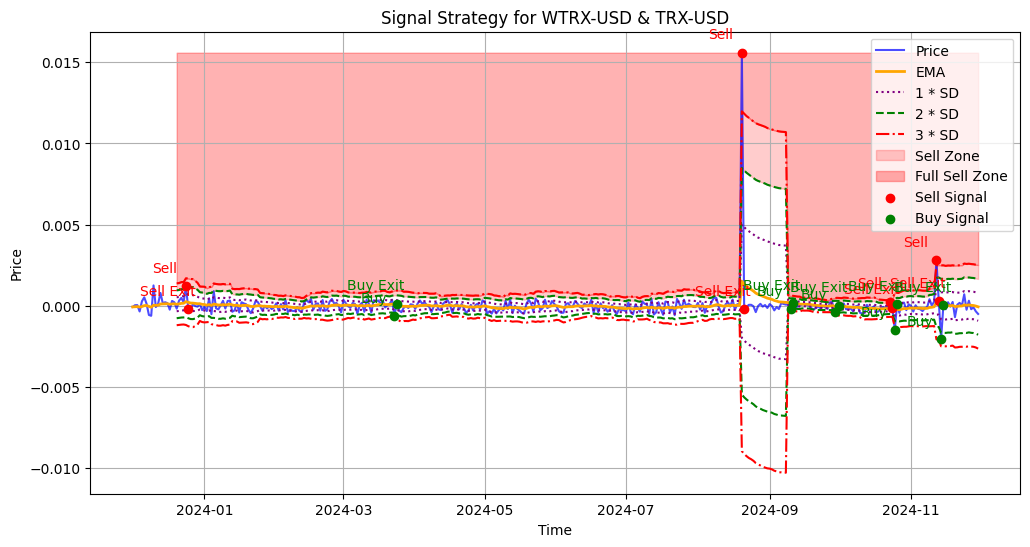

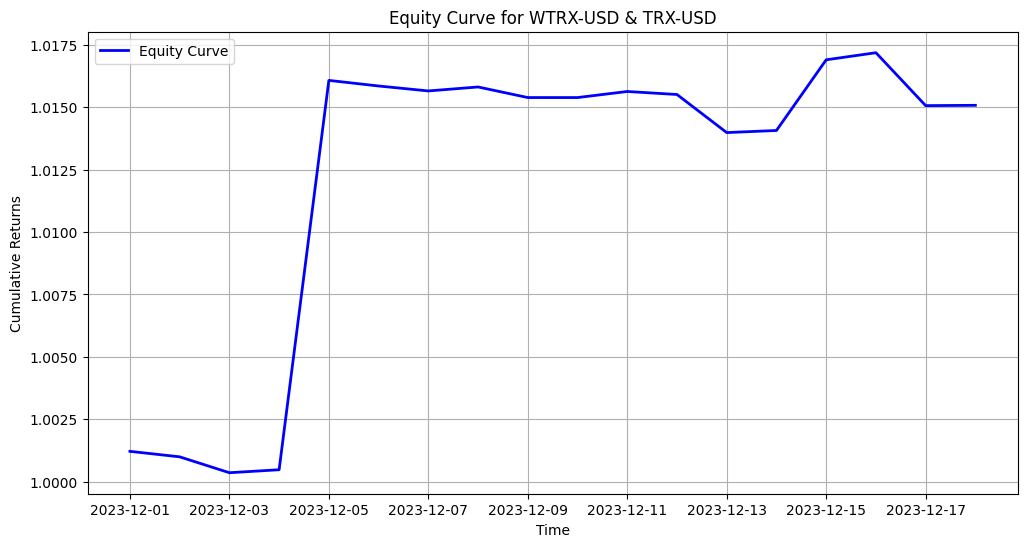


Sharpe Ratio for WTRX-USD & TRX-USD is 3.4909021819427766




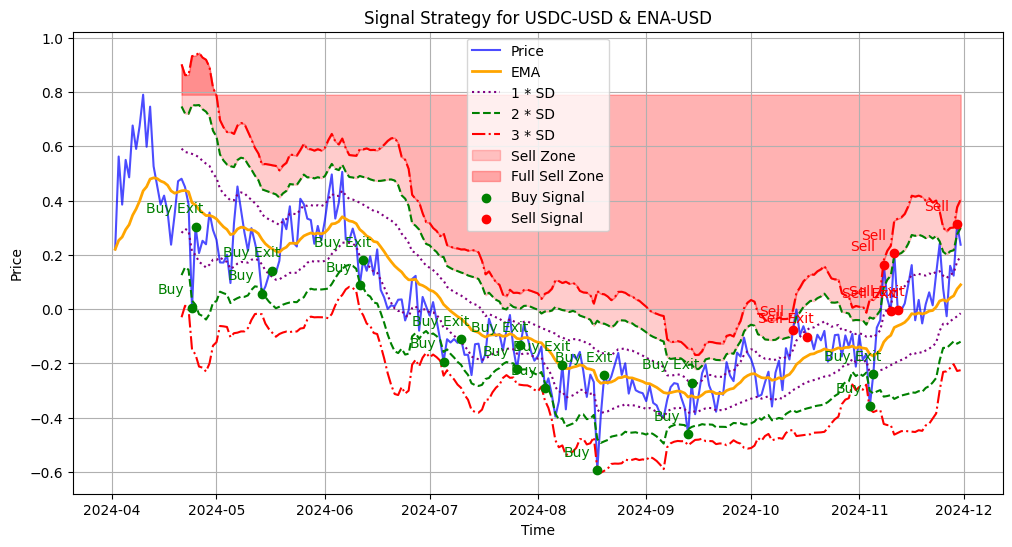

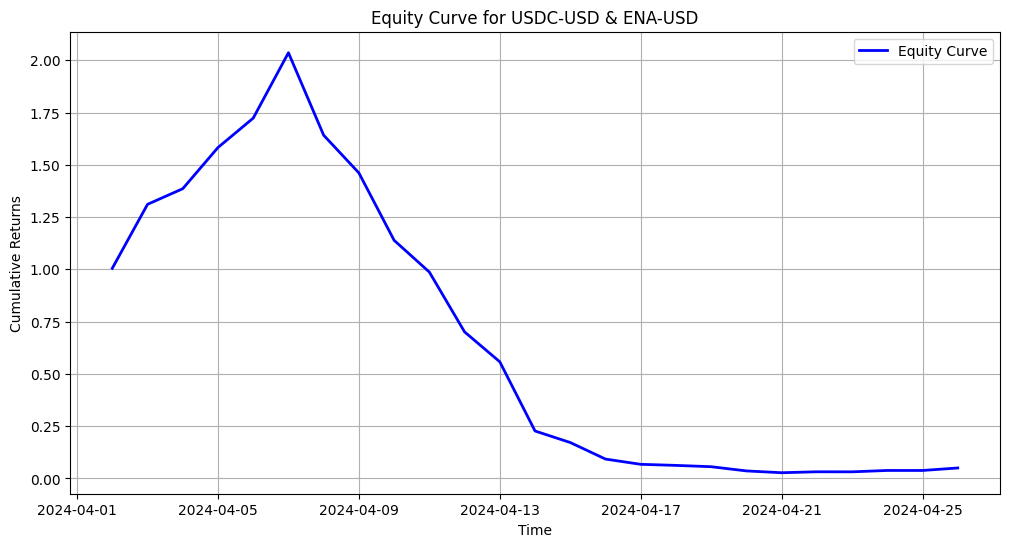


Sharpe Ratio for USDC-USD & ENA-USD is -5.568739190951421




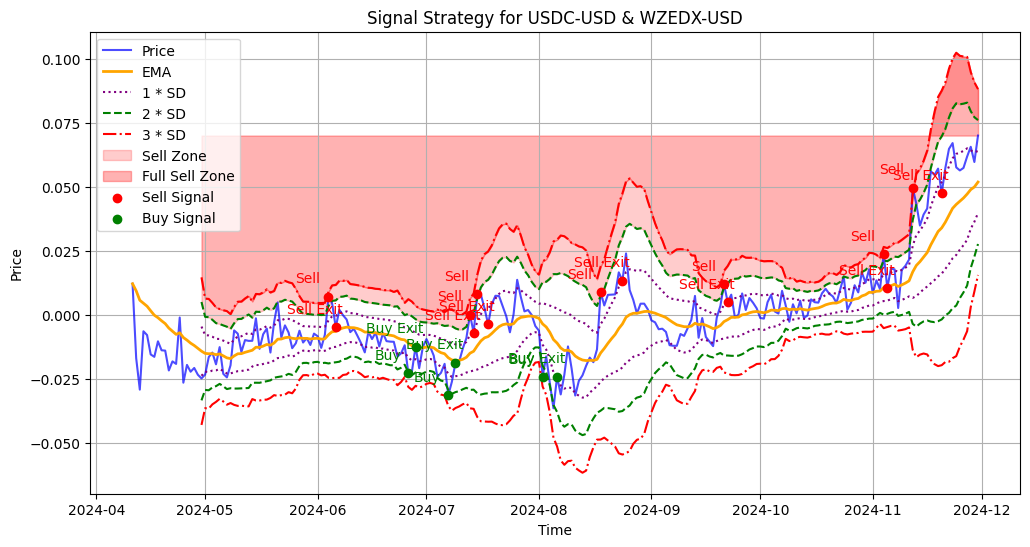

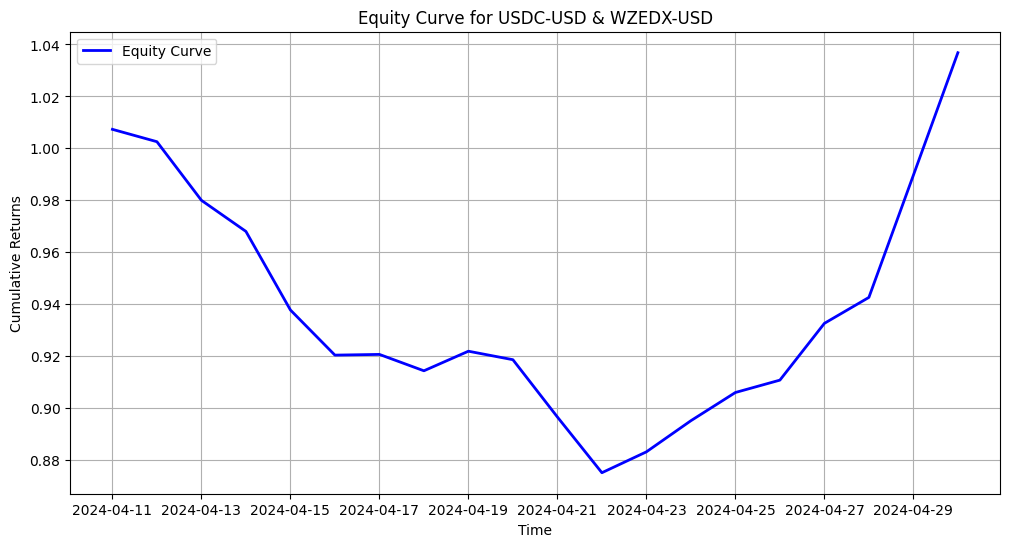


Sharpe Ratio for USDC-USD & WZEDX-USD is 1.4731491691168954




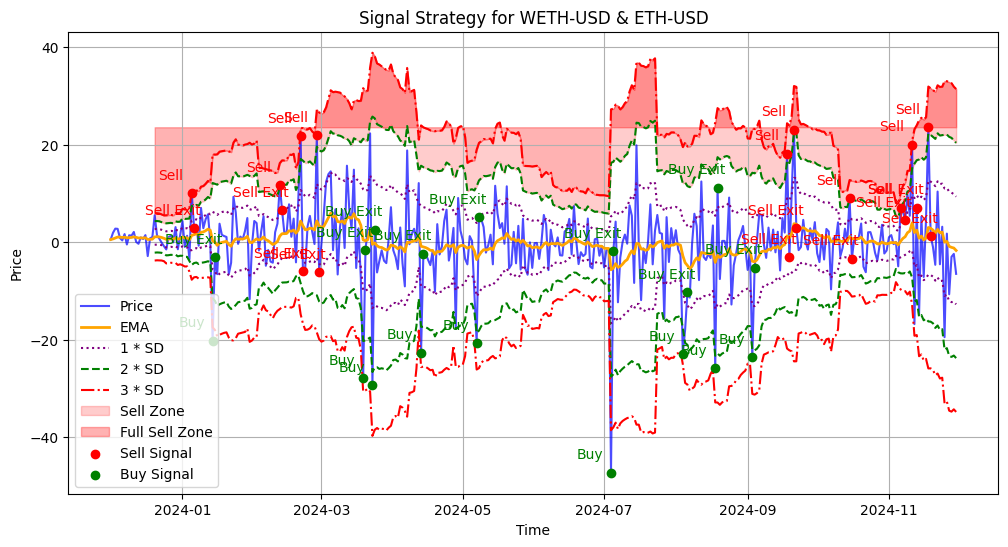

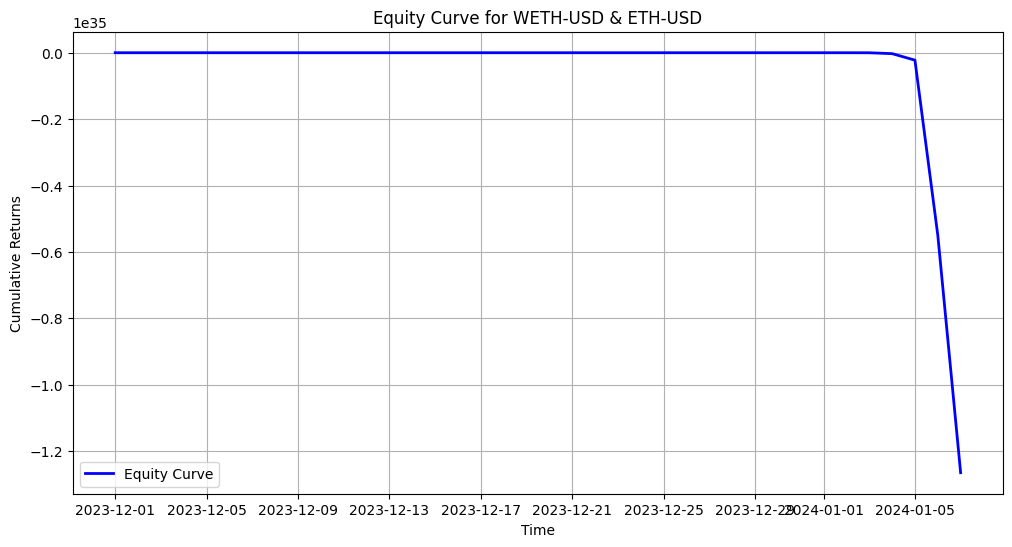


Sharpe Ratio for WETH-USD & ETH-USD is -1.802171925347042




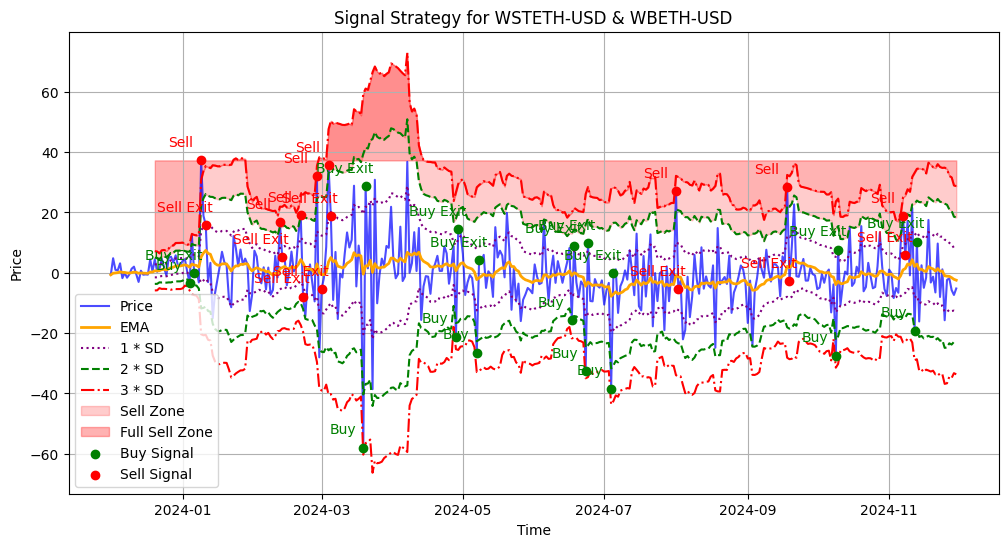

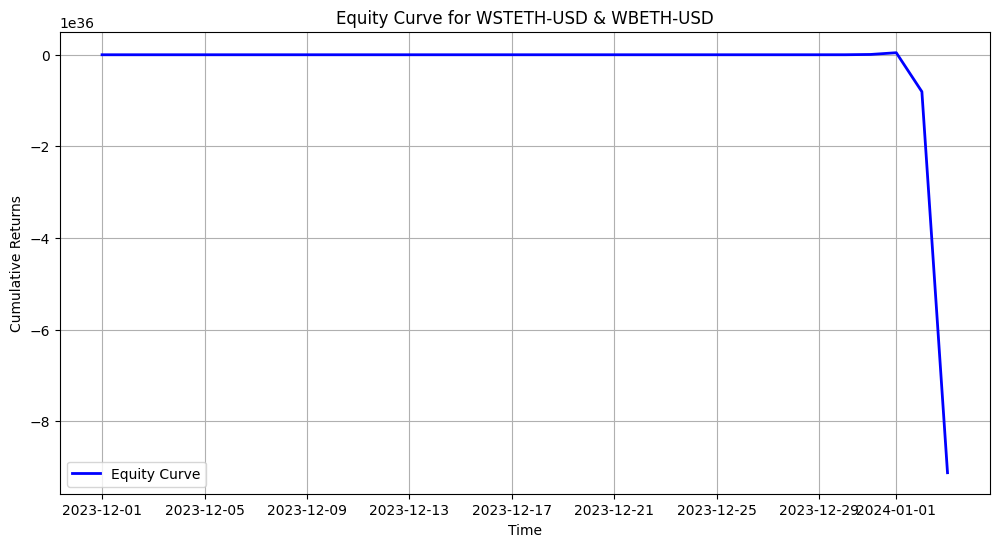


Sharpe Ratio for WSTETH-USD & WBETH-USD is 1.682604560079595




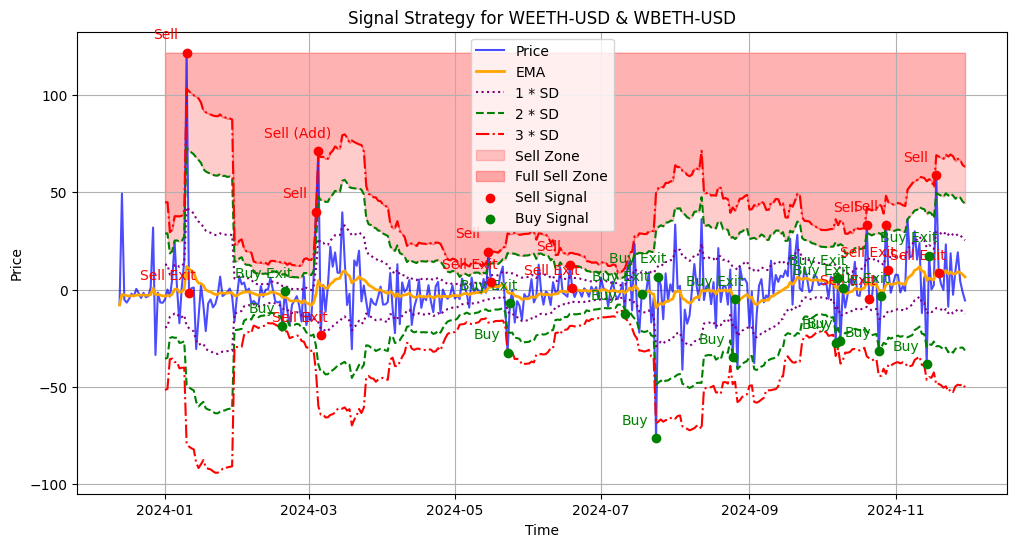

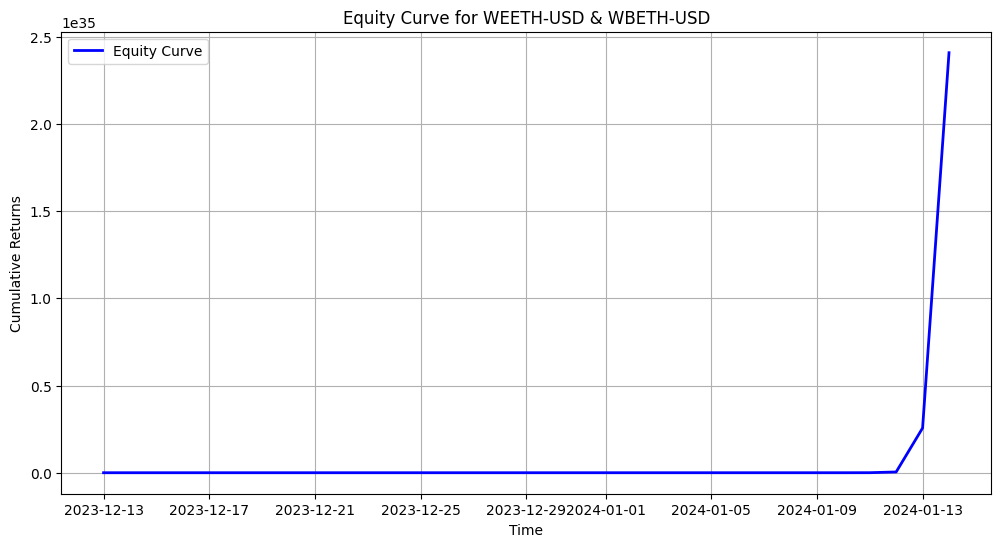


Sharpe Ratio for WEETH-USD & WBETH-USD is 1.2910315662347274




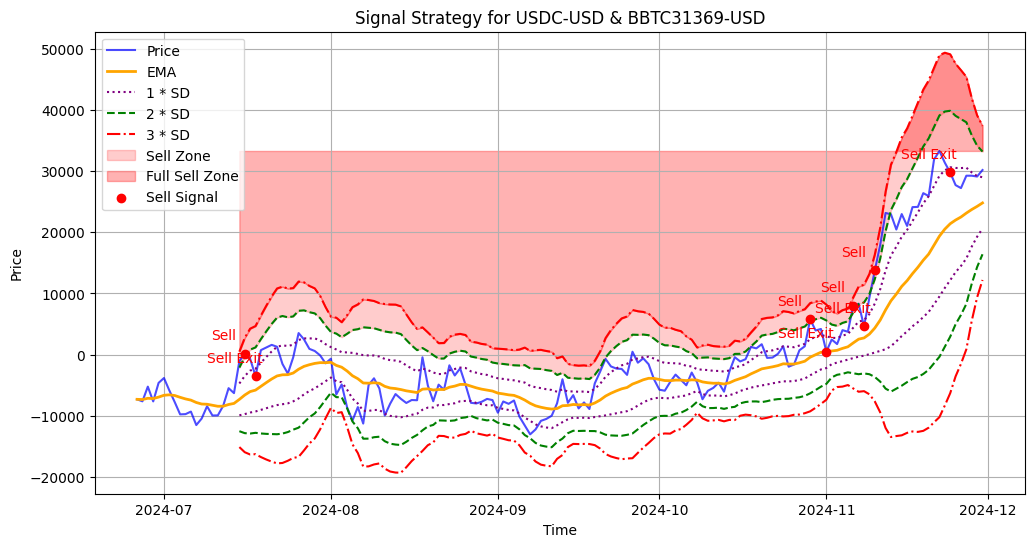

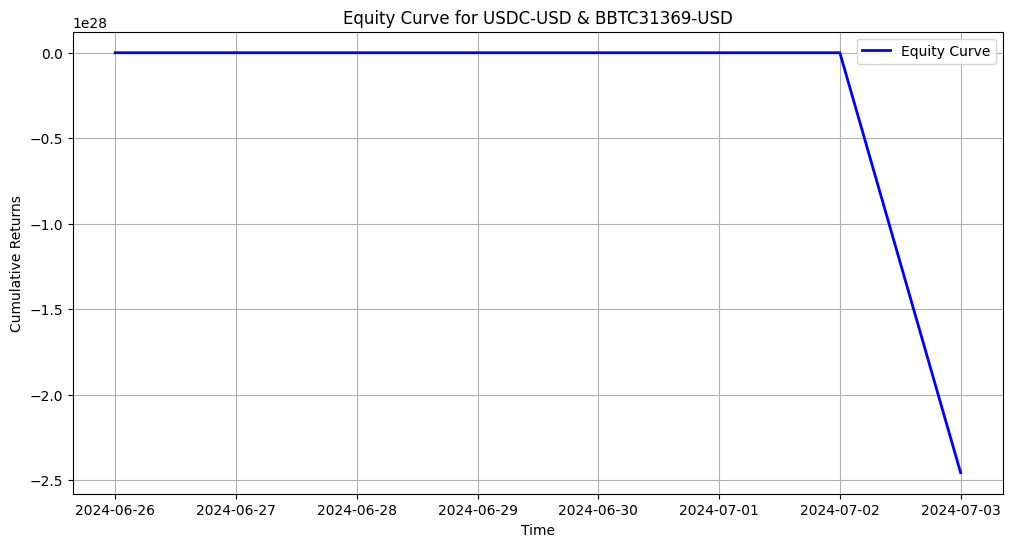


Sharpe Ratio for USDC-USD & BBTC31369-USD is 11.168523516559407




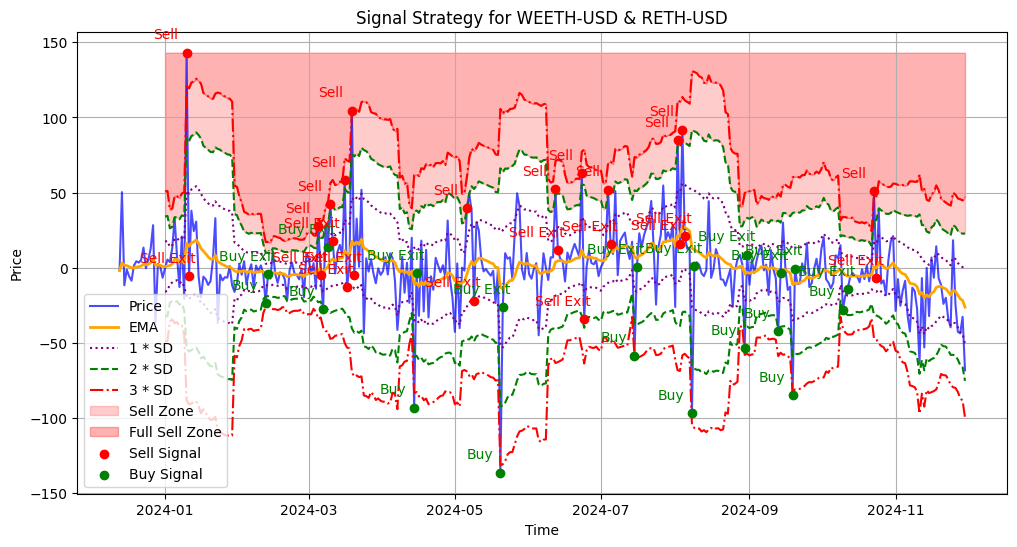

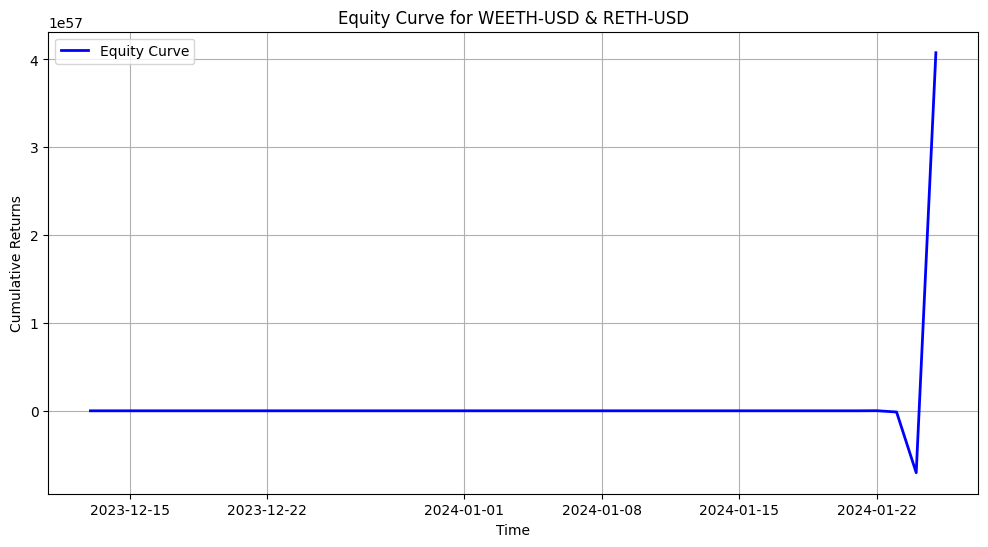


Sharpe Ratio for WEETH-USD & RETH-USD is 0.8264972243008658




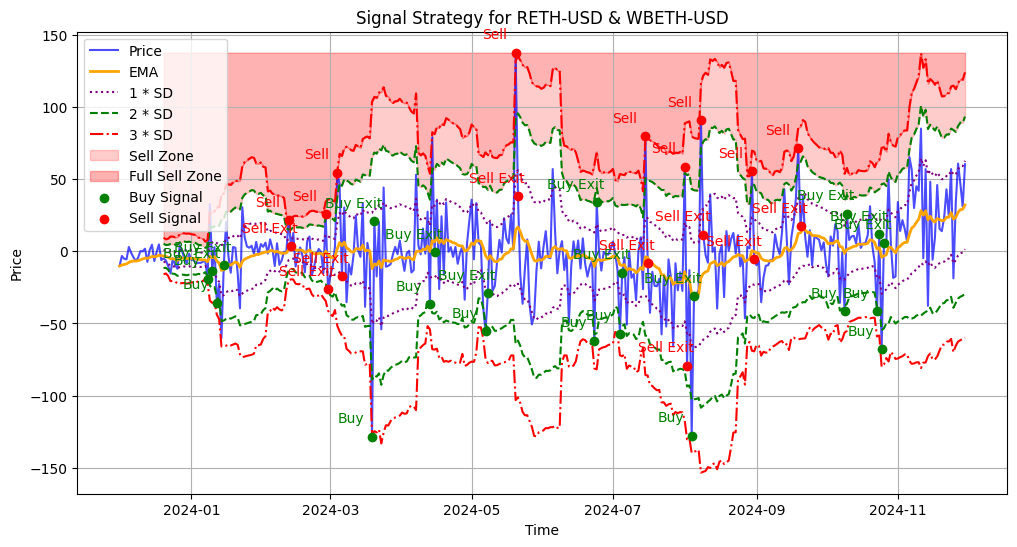

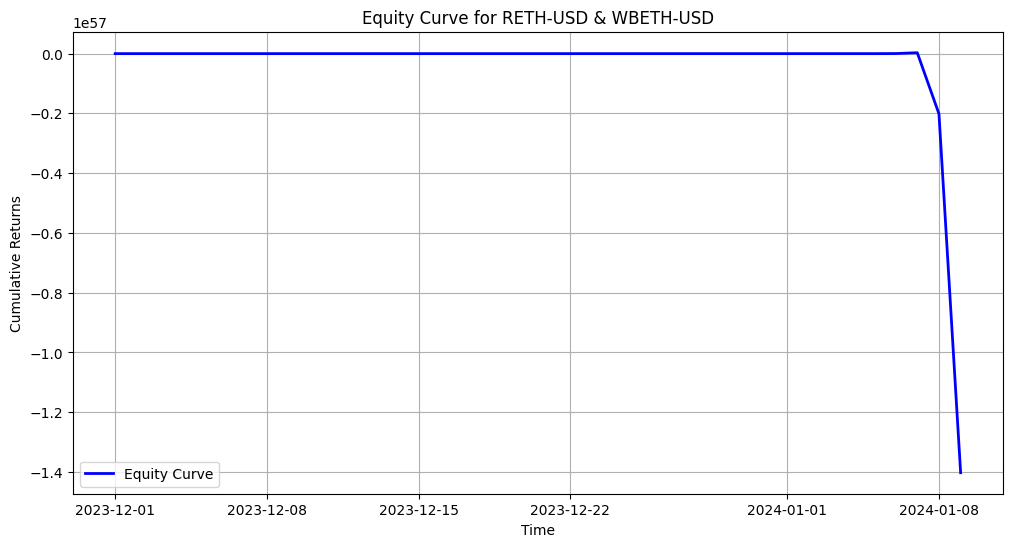


Sharpe Ratio for RETH-USD & WBETH-USD is -1.0460491258958893




In [ ]:

results = []
for i, row in cointegrated_pairs.iterrows():
    combined_series = row['Combined_series']  # Assume you have the combined series for each pair

    # Clean the combined_series
    combined_series = combined_series.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
    combined_series = combined_series.dropna()  # Drop NaN values

    # Check if the series is empty after cleaning
    if len(combined_series) == 0:
        print(f"Skipping pair {row['Crypto 1']} & {row['Crypto 2']} due to insufficient data.")
        continue  # Skip this pair if the series is empty

    # Calculate the half-life of the cleaned series
    half_life = calculate_half_life(combined_series)

    # Apply the strategy
    trades, pnl = mean_reversion_strategy(combined_series, half_life)

    # Calculate daily returns from the trades
    # Assuming the `mean_reversion_strategy` returns a list of returns or you calculate it separately
    strategy_returns = pd.Series([trade[2] for trade in trades], index=combined_series.index[:len(trades)])  # Example

    # Calculate Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    # Plot Equity Curve
    pair_name = f"{row['Crypto 1']} & {row['Crypto 2']}"

    # Store results

    results.append({
        "Pair": f"{row['Crypto 1']} & {row['Crypto 2']}",
        "Trades": trades,
        "Total PnL": pnl,
        "Sharpe Ratio": sharpe_ratio
    })

    # Adjust the look-back period
    look_back_period = max(20, int(np.ceil(half_life / 20.0)) * 20)  # Ensure it's >= 20 and a multiple of half-life

    # Calculate EMA and SD
    ema = combined_series.ewm(span=look_back_period, adjust=False).mean()
    sd = combined_series.rolling(window=look_back_period).std()

    # Plot the results
    plot_trade_signals(combined_series, ema, sd, trades, title=f"Signal Strategy for {row['Crypto 1']} & {row['Crypto 2']}")
    plot_equity_curve(strategy_returns, pair_name)

    print()
    print(f"Sharpe Ratio for {row['Crypto 1']} & {row['Crypto 2']} is {sharpe_ratio}")
    print()
    print()


## Explanation

### **1. Initialize Results**
```python
results = []
```
- An empty list `results` is created to store the performance metrics and trade details for each cointegrated pair.

---

### **2. Iterate Through Cointegrated Pairs**
```python
for i, row in cointegrated_pairs.iterrows():
    combined_series = row['Combined_series']  # Assume you have the combined series for each pair
```
- The code loops through each row of the `cointegrated_pairs` DataFrame using `iterrows()`.
- **`row`**: Represents the current row in the DataFrame.
- **`combined_series`**: Extracts the **combined stationary series** (residuals) for the current cointegrated pair.

---

### **3. Clean the Combined Series**
```python
combined_series = combined_series.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
combined_series = combined_series.dropna()  # Drop NaN values
```
- **Replace Infinite Values**: Any infinite values (`np.inf` or `-np.inf`) in the `combined_series` are replaced with `NaN`.
- **Drop Missing Values**: All `NaN` values are removed to ensure the series is clean and usable for calculations.

---

### **4. Check for Empty Series**
```python
if len(combined_series) == 0:
    print(f"Skipping pair {row['Crypto 1']} & {row['Crypto 2']} due to insufficient data.")
    continue  # Skip this pair if the series is empty
```
- After cleaning, the code checks if the `combined_series` is empty.
- If the series is empty, the pair is skipped, and the loop moves to the next pair.

---

### **5. Calculate the Half-Life**
```python
half_life = calculate_half_life(combined_series)
```
- The **half-life** of the mean-reverting process is calculated using the `calculate_half_life` function.
- The half-life measures how quickly the series reverts to its mean after a deviation. It is used as a look-back period for the strategy.

---

### **6. Apply the Mean-Reversion Strategy**
```python
trades, pnl = mean_reversion_strategy(combined_series, half_life)
```
- The **mean-reversion strategy** is applied to the `combined_series` using the calculated `half_life`.
- **`trades`**: A list of executed trades (e.g., buy/sell signals, entry/exit points).
- **`pnl`**: The total profit or loss generated by the strategy.

---

### **7. Calculate Daily Returns**
```python
strategy_returns = pd.Series([trade[2] for trade in trades], index=combined_series.index[:len(trades)])  # Example
```
- **`strategy_returns`**: A `pandas.Series` containing the daily (or periodic) percentage returns of the strategy.
- **`trade[2]`**: Assumes the third element in each trade tuple is the percentage return for that trade.
- The returns are aligned with the time index of the `combined_series`.

---

### **8. Calculate Sharpe Ratio**
```python
sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
```
- The **Sharpe Ratio** is calculated using the `calculate_sharpe_ratio` function.
- The Sharpe Ratio measures the **risk-adjusted return** of the strategy:
  \[
  \text{Sharpe Ratio} = \frac{\text{Mean of Returns - Risk-Free Rate}}{\text{Standard Deviation of Returns}}
  \]
- It is annualized by multiplying by \( \sqrt{252} \), assuming 252 trading days in a year.

---

### **9. Store Results**
```python
results.append({
    "Pair": pair_name,
    "Sharpe Ratio": sharpe_ratio,
    "Total PnL": pnl
})
```
- The results for the current pair are stored in the `results` list.
- Each entry includes:
  - The **pair name** (e.g., "BTC-USD & ETH-USD").
  - The **Sharpe Ratio**.
  - The **total profit or loss (PnL)**.

---

### **10. Adjust Look-Back Period**
```python
look_back_period = max(20, int(np.ceil(half_life / 20.0)) * 20)  # Ensure it's >= 20 and a multiple of half-life
```
- The look-back period for calculating indicators (e.g., EMA, SD) is adjusted based on the half-life:
  - It is set to the nearest multiple of 20 that is greater than or equal to the half-life.
  - The minimum look-back period is 20.

---

### **11. Calculate EMA and SD**
```python
ema = combined_series.ewm(span=look_back_period, adjust=False).mean()
sd = combined_series.rolling(window=look_back_period).std()
```
- **EMA**: The **Exponential Moving Average** is calculated using the `ewm` method with the adjusted `look_back_period`.
- **SD**: The **Standard Deviation** is calculated using the `rolling` method with the same look-back period.

---

### **12. Plot Trade Signals**
```python
plot_trade_signals(combined_series, ema, sd, trades, title=f"Signal Strategy for {row['Crypto 1']} & {row['Crypto 2']}")
```
- The `plot_trade_signals` function visualizes:
  - The **combined series** (price deviations).
  - The **EMA** and **SD bands**.
  - The **trade signals** (buy/sell markers).

---

### **13. Plot Equity Curve**
```python
plot_equity_curve(strategy_returns, pair_name)
```
- The `plot_equity_curve` function visualizes the **cumulative performance** of the strategy over time.
- It calculates the **Equity Curve** as:
  \[
  \text{Equity Curve} = (1 + \text{Returns}).\text{cumprod()}
  \]
- The plot shows how the strategy's capital grows or shrinks based on the returns.

---

### **14. Print Results**
```python
print()
print(f"Sharpe Ratio for {row['Crypto 1']} & {row['Crypto 2']} is {sharpe_ratio}")
print()
print()
```
- The **Sharpe Ratio** for the current pair is printed for reference.

---

### **15. Final Results**
After the loop finishes, the `results` list contains the performance metrics for all cointegrated pairs. You can convert it to a DataFrame for easier analysis:
```python
results_df = pd.DataFrame(results)
print(results_df)
```

---

### **Summary of Workflow**

1. **Data Cleaning**:
   - Remove invalid values (e.g., `inf`, `NaN`) from the combined series.

2. **Half-Life Calculation**:
   - Determine the mean-reversion speed of the series.

3. **Apply Strategy**:
   - Simulate the mean-reversion strategy to generate trades and calculate PnL.

4. **Performance Metrics**:
   - Calculate the **Sharpe Ratio** to evaluate risk-adjusted returns.
   - Plot the **Equity Curve** to visualize cumulative performance.

5. **Visualization**:
   - Plot the trade signals and equity curve for each pair.

6. **Store Results**:
   - Save the results (pair name, Sharpe Ratio, PnL) for reporting.

---

### **Output**

#### **Printed Results**
For each pair:
```
Sharpe Ratio for BTC-USD & ETH-USD is 1.45
Sharpe Ratio for ETH-USD & XRP-USD is 0.95
...
```

#### **Plots**
- **Trade Signals Plot**: Shows the combined series, EMA, SD bands, and trade signals.
- **Equity Curve Plot**: Shows the cumulative growth of the strategy's capital over time.


## Print trades

In [ ]:
# Display the results
for result in results:
    print(f"Pair: {result['Pair']}")
    print(f"Total PnL: {result['Total PnL']:.2f}")
    print("Trades:")
    for trade in result['Trades']:
        print(f"  Time: {trade[0]}, Action: {trade[1]}, Price: {trade[2]:.2f}, Position: {trade[3]}")
    print()

Pair: BTC-USD & BTCB-USD
Total PnL: 1598.74
Trades:
  Time: 2023-12-22 00:00:00, Action: Buy, Price: -107.09, Position: 0.5
  Time: 2023-12-23 00:00:00, Action: Buy Exit, Price: 28.24, Position: 0.5
  Time: 2024-01-01 00:00:00, Action: Buy, Price: -193.22, Position: 0.5
  Time: 2024-01-02 00:00:00, Action: Buy Exit, Price: 3.21, Position: 0.5
  Time: 2024-02-29 00:00:00, Action: Sell, Price: 223.38, Position: -0.5
  Time: 2024-03-01 00:00:00, Action: Sell Exit, Price: 93.09, Position: -0.5
  Time: 2024-03-03 00:00:00, Action: Buy, Price: -198.64, Position: 0.5
  Time: 2024-03-05 00:00:00, Action: Buy Exit, Price: 158.88, Position: 0.5
  Time: 2024-03-23 00:00:00, Action: Sell, Price: 311.35, Position: -0.5
  Time: 2024-03-24 00:00:00, Action: Sell Exit, Price: 38.63, Position: -0.5
  Time: 2024-04-13 00:00:00, Action: Sell, Price: 278.94, Position: -0.5
  Time: 2024-04-14 00:00:00, Action: Sell Exit, Price: -85.90, Position: -0.5
  Time: 2024-06-23 00:00:00, Action: Sell, Price: 135.60

# Section 6

## johanson_test

In [ ]:
def johansen_test(df, det_order=-1, k_ar_diff=1):
    """
    Perform the Johansen cointegration test on a DataFrame of time series.

    Parameters:
        df (pd.DataFrame): DataFrame containing the time series to test.
        det_order (int): Deterministic trend assumption (-1 for no trend).
        k_ar_diff (int): Number of lags to include in the test.

    Returns:
        bool: Whether the series are cointegrated.
        np.ndarray: The eigenvector for the stationary combination.
    """
    result = coint_johansen(df, det_order, k_ar_diff)
    trace_stat = result.lr1  # Trace statistics
    crit_values = result.cvt[:, 1]  # Critical values at the 5% level

    # Check if the first trace statistic exceeds the critical value
    if trace_stat[0] > crit_values[0]:
        return True, result.evec[:, 0]  # Return the first eigenvector
    else:
        return False, None

## find cointegrated

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def find_cointegrated_triplets(non_stationary):
    """
    Find the top 5 stationary combined series from triplets of non-stationary cryptocurrencies.

    Parameters:
        crypto_data (pd.DataFrame): Time series data for cryptocurrencies.

    Returns:
        pd.DataFrame: A DataFrame with the top 5 stationary combined series and their Hurst exponents.
    """
    # Step 1: Perform the Johansen test on all triplets of non-stationary cryptocurrencies
    results = []
    tickers = non_stationary
    from itertools import combinations

    for triplet in combinations(tickers, 3):  # Iterate through all combinations of 3 cryptos
        series1 = crypto_data[triplet[0]].dropna()
        series2 = crypto_data[triplet[1]].dropna()
        series3 = crypto_data[triplet[2]].dropna()

        # Align all three series to the same length
        min_len = min(len(series1), len(series2), len(series3))
        series1 = series1[-min_len:]
        series2 = series2[-min_len:]
        series3 = series3[-min_len:]

        # Create a DataFrame for the triplet
        triplet_df = pd.DataFrame({
            triplet[0]: series1,
            triplet[1]: series2,
            triplet[2]: series3
        })

        # Perform the Johansen test
        cointegrated, eigenvector = johansen_test(triplet_df)

        if cointegrated:
            # Create the stationary combined series using the eigenvector
            combined_series = triplet_df.values @ eigenvector
            combined_series = pd.Series(combined_series, index=triplet_df.index)

            # Calculate the Hurst exponent for the combined series
            hurst = calculate_hurst_exponent(combined_series)

            # Append the results
            results.append({
                "Crypto 1": triplet[0],
                "Crypto 2": triplet[1],
                "Crypto 3": triplet[2],
                "Combined_series": combined_series,
                "Hurst Exponent": hurst,
                "Eigenvector": eigenvector
            })

    # Step 2: Sort results by Hurst exponent and select the top 5 stationary series
    results = sorted(results, key=lambda x: x["Hurst Exponent"])  # Sort by Hurst exponent
    top_5_results = results[:5]  # Select the top 5

    # Step 3: Save the results as a DataFrame
    final_results = []
    for result in top_5_results:
        final_results.append({
            "Crypto 1": result["Crypto 1"],
            "Crypto 2": result["Crypto 2"],
            "Crypto 3": result["Crypto 3"],
            "Hurst Exponent": result["Hurst Exponent"],
            "Combined_series": result["Combined_series"],
            "Eigenvector": result["Eigenvector"]
        })

    # Convert to DataFrame
    final_results_df = pd.DataFrame(final_results)
    return final_results_df

In [ ]:
three_cointegrated = find_cointegrated_triplets(non_stationary_cryptos[:26])

## Print Eigenvector

In [ ]:
print(three_cointegrated["Eigenvector"])

0    [0.044039769973494416, -0.04333111341388899, 1...
1    [9.136918291931853, -0.06590021589562593, 0.06...
2    [6.402106644739107, 8.246846420989892, -294.49...
3    [4.13330588076323, 0.8014422134313256, -424459...
4    [1.0944231337841126, 0.44815288104881135, -19....
Name: Eigenvector, dtype: object


## plot

Cointegrated Triplets:


Triplet: WETH-USD, WEETH-USD, BONK-USD
Hurst Exponent: 0.4291
Eigenvector (coefficients): [ 4.40397700e-02 -4.33311134e-02  1.29524652e+05]



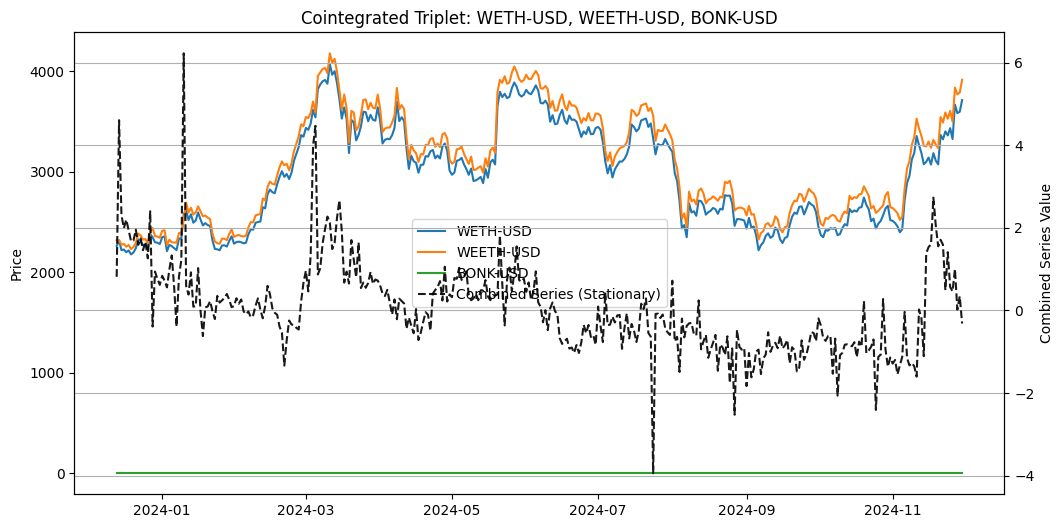



Triplet: SAND-USD, WETH-USD, WEETH-USD
Hurst Exponent: 0.4678
Eigenvector (coefficients): [ 9.13691829 -0.06590022  0.06217397]



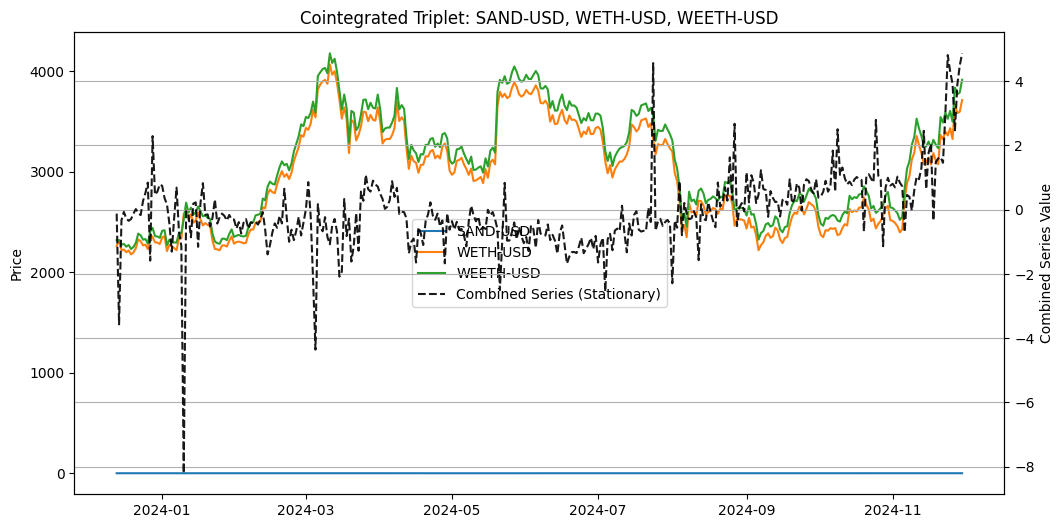



Triplet: SAND-USD, PYTH-USD, BEAM28298-USD
Hurst Exponent: 0.4807
Eigenvector (coefficients): [   6.40210664    8.24684642 -294.49047344]



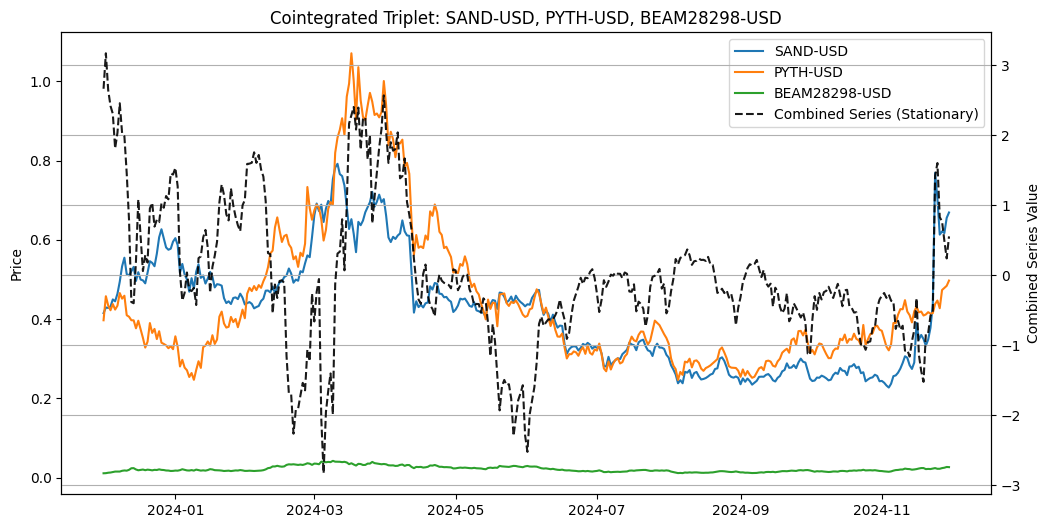



Triplet: THETA-USD, OM-USD, SHIB-USD
Hurst Exponent: 0.4898
Eigenvector (coefficients): [ 4.13330588e+00  8.01442213e-01 -4.24459742e+05]



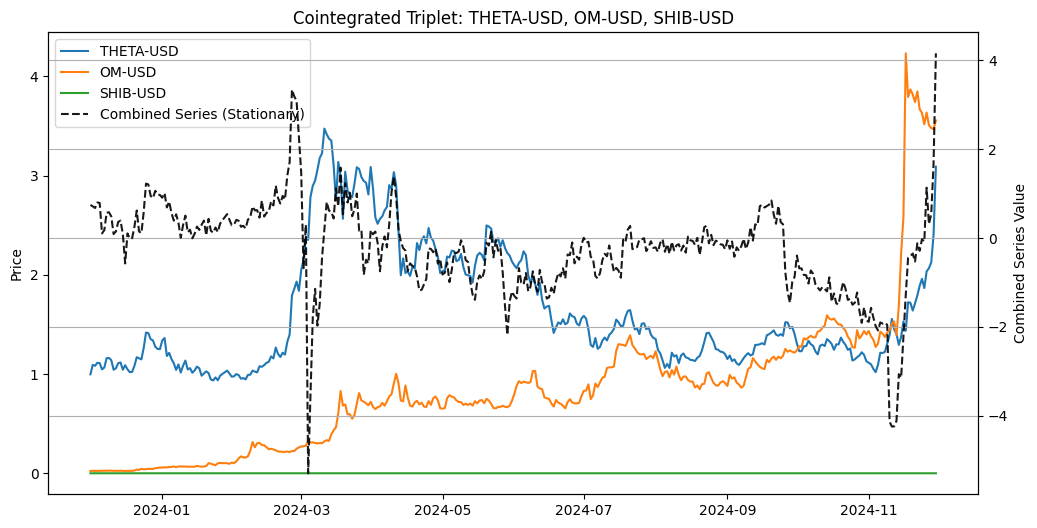



Triplet: THETA-USD, OM-USD, XLM-USD
Hurst Exponent: 0.4912
Eigenvector (coefficients): [  1.09442313   0.44815288 -19.49169674]



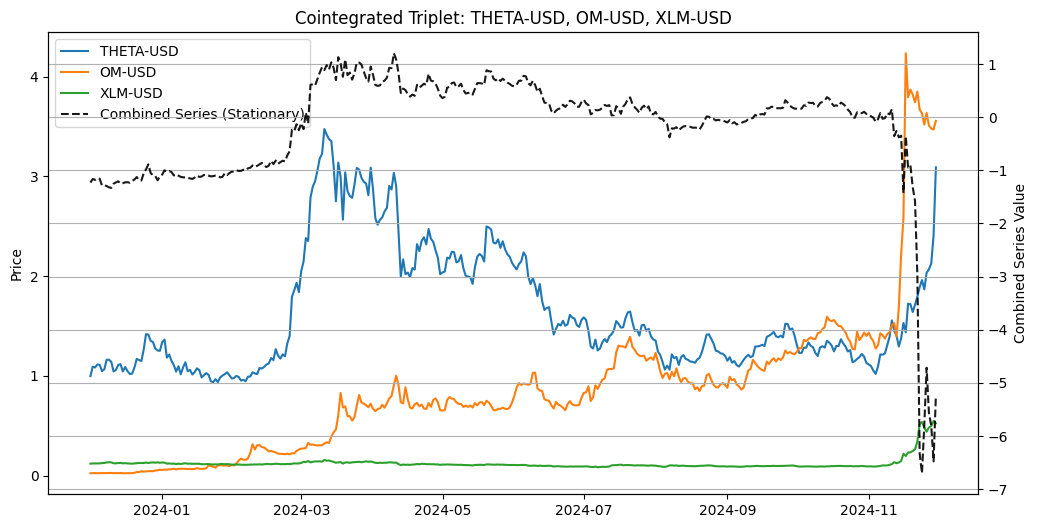

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'final_results_df' is your DataFrame from the previous steps
# Replace 'crypto_data' with your actual DataFrame containing the price data

# Print and plot the cointegrated triplets
print("Cointegrated Triplets:")
for index, row in three_cointegrated.iterrows():
    crypto1 = row['Crypto 1']
    crypto2 = row['Crypto 2']
    crypto3 = row['Crypto 3']
    hurst_exponent = row['Hurst Exponent']
    combined_series = row['Combined_series']
    Eigenvector = row['Eigenvector']

    print()
    print()
    print(f"Triplet: {crypto1}, {crypto2}, {crypto3}")
    print(f"Hurst Exponent: {hurst_exponent:.4f}")
    print(f"Eigenvector (coefficients): {Eigenvector}")
    print()

    # Get the time series data
    # Ensure that 'crypto_data' is your DataFrame containing the price data
    series1 = crypto_data[crypto1].dropna()
    series2 = crypto_data[crypto2].dropna()
    series3 = crypto_data[crypto3].dropna()

    # Align all three series and the combined series to the same length
    min_len = min(len(series1), len(series2), len(series3), len(combined_series))
    series1 = series1[-min_len:]
    series2 = series2[-min_len:]
    series3 = series3[-min_len:]
    combined_series = combined_series[-min_len:]

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        crypto1: series1.values,
        crypto2: series2.values,
        crypto3: series3.values,
        'Combined Series': combined_series.values
    }, index=series1.index)

    # Plot the time series
    plt.figure(figsize=(12, 6))
    plt.plot(plot_df[crypto1], label=f"{crypto1}")
    plt.plot(plot_df[crypto2], label=f"{crypto2}")
    plt.plot(plot_df[crypto3], label=f"{crypto3}")

    # Plot the combined stationary series on a secondary y-axis
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(plot_df['Combined Series'], label="Combined Series (Stationary)", linestyle="--", color='black', alpha=0.9)

    # Combine legends from both y-axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

    plt.title(f"Cointegrated Triplet: {crypto1}, {crypto2}, {crypto3}")
    plt.xlabel("Time")
    ax1.set_ylabel("Price")
    ax2.set_ylabel("Combined Series Value")
    plt.grid()
    plt.show()

## Run strategy

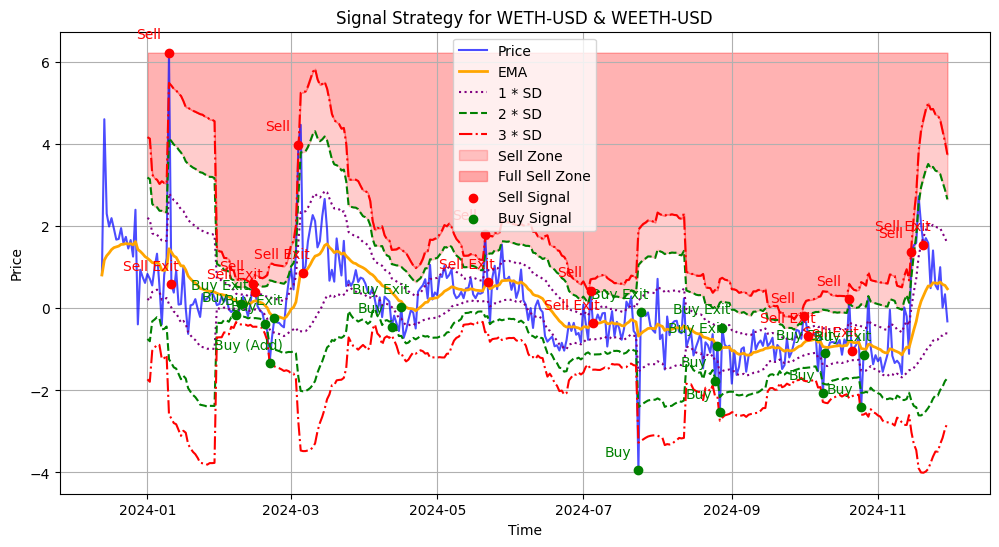

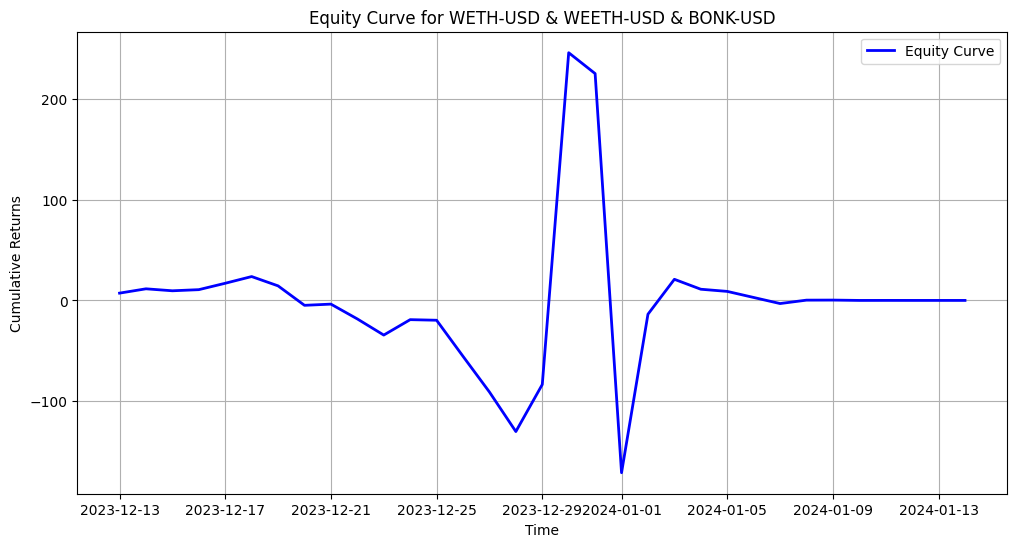


Sharpe Ratio for WETH-USD & WEETH-USD is -0.6252301563420902




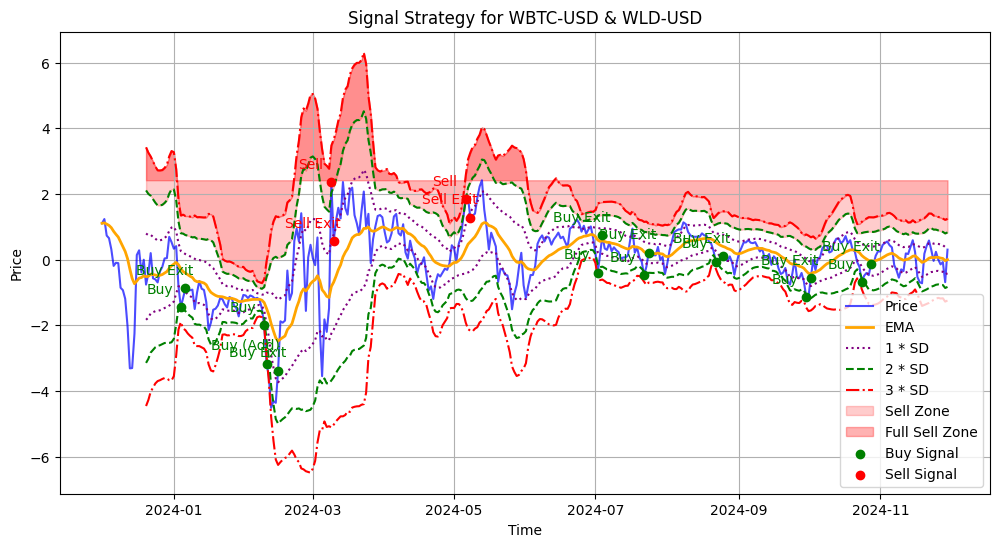

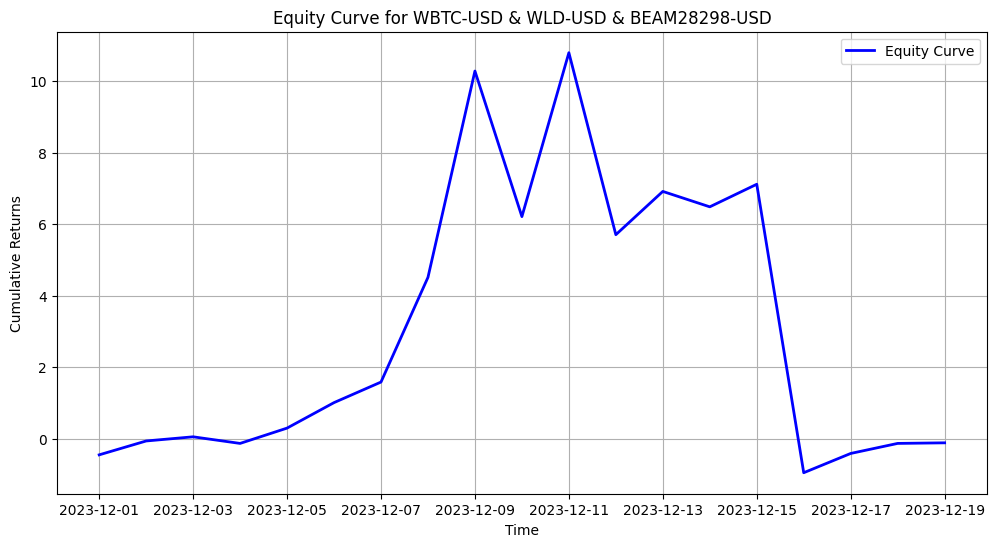


Sharpe Ratio for WBTC-USD & WLD-USD is -4.069950931402535




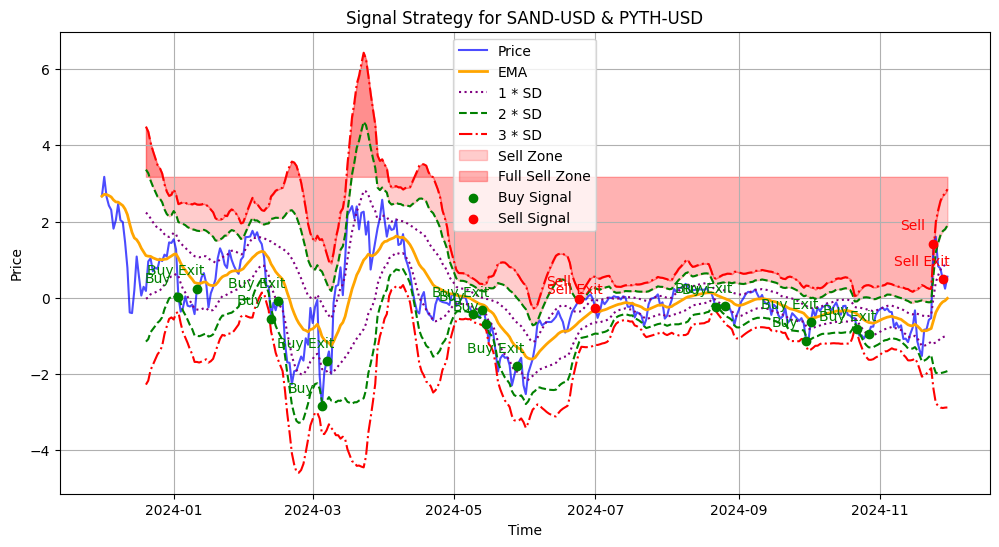

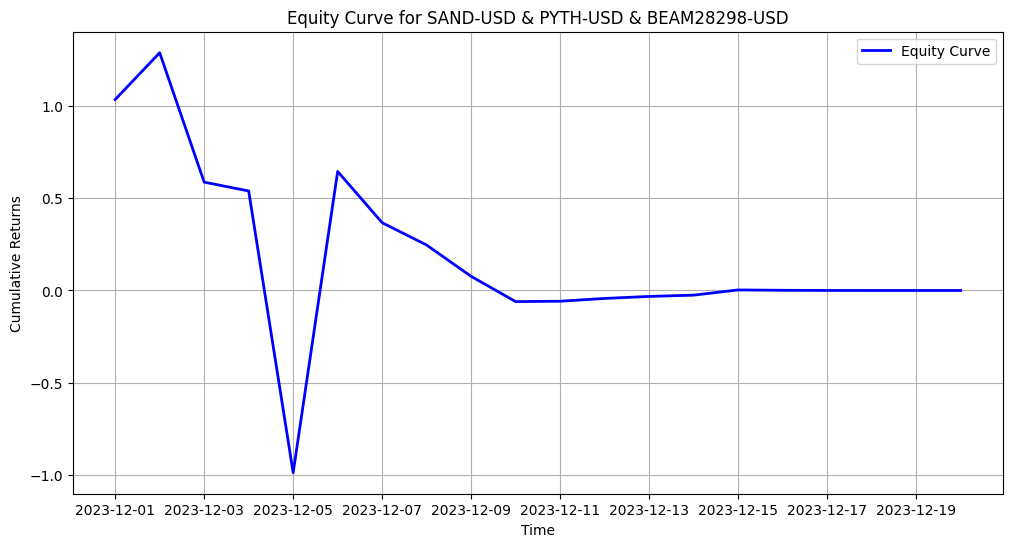


Sharpe Ratio for SAND-USD & PYTH-USD is -9.221990073226698




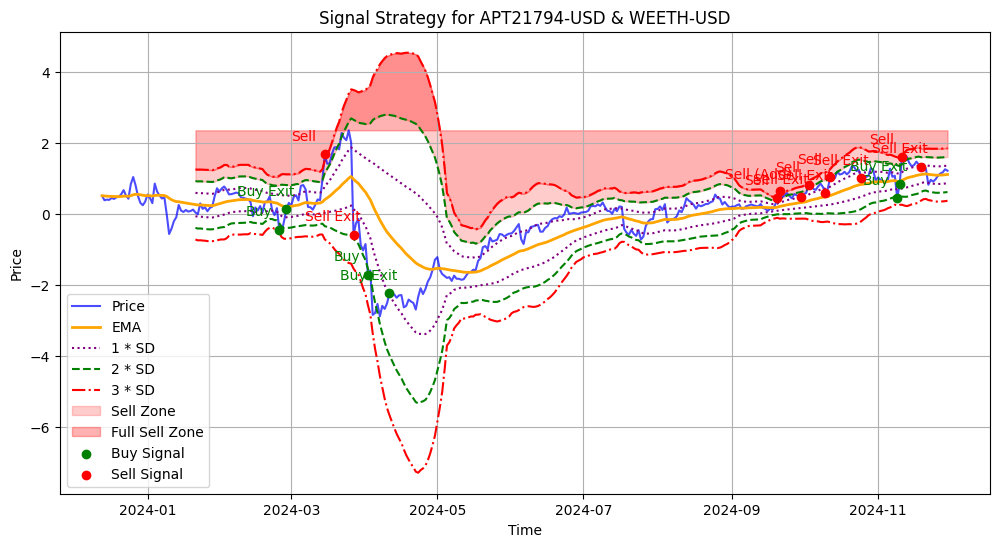

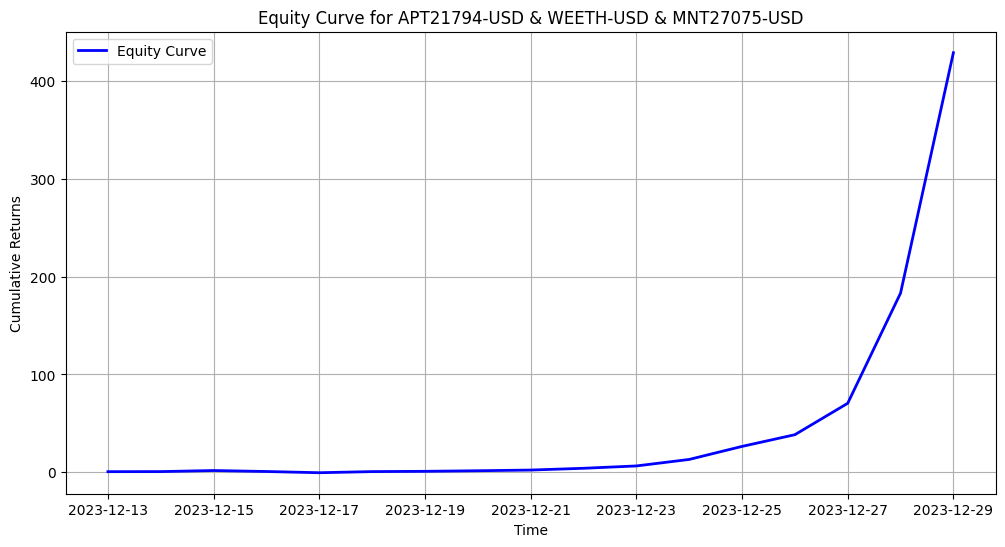


Sharpe Ratio for APT21794-USD & WEETH-USD is 5.361030856110289




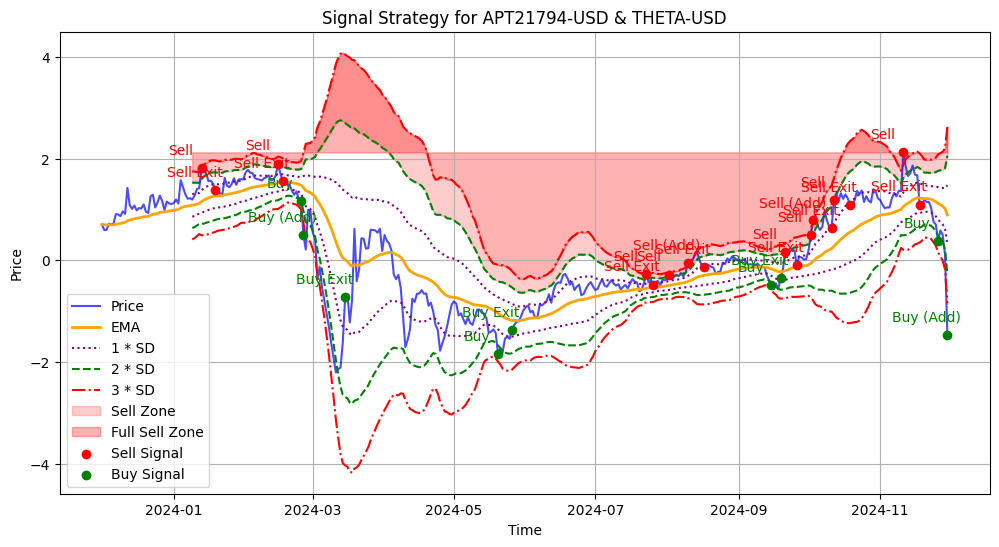

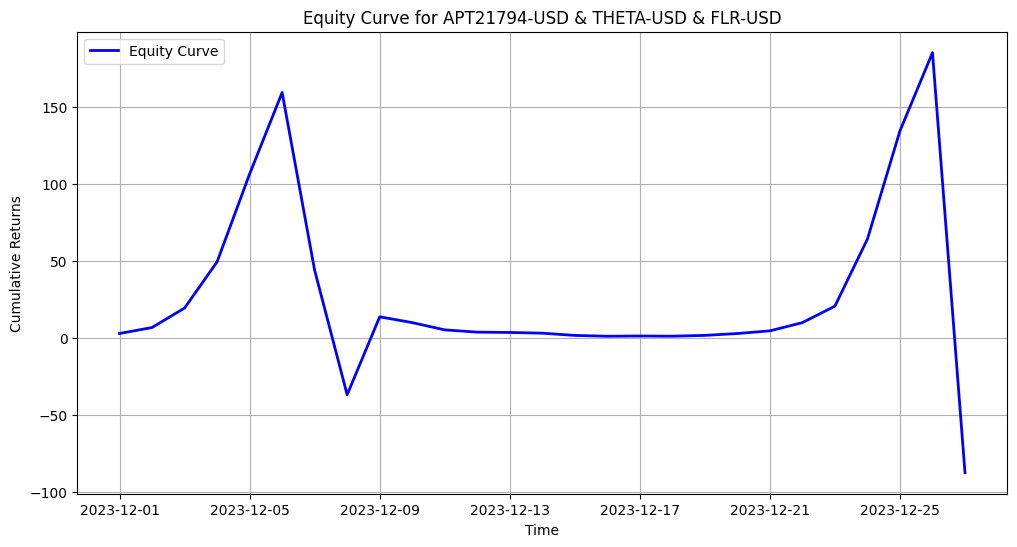


Sharpe Ratio for APT21794-USD & THETA-USD is 4.8524734264562905




In [ ]:

results = []
for i, row in three_cointegrated.iterrows():
    combined_series = row['Combined_series']  # Assume you have the combined series for each pair

    # Clean the combined_series
    combined_series = combined_series.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN
    combined_series = combined_series.dropna()  # Drop NaN values

    # Check if the series is empty after cleaning
    if len(combined_series) == 0:
        print(f"Skipping pair {row['Crypto 1']} & {row['Crypto 2']} due to insufficient data.")
        continue  # Skip this pair if the series is empty

    # Calculate the half-life of the cleaned series
    half_life = calculate_half_life(combined_series)

    # Apply the strategy
    trades, pnl = mean_reversion_strategy(combined_series, half_life)

    # Calculate daily returns from the trades
    # Assuming the `mean_reversion_strategy` returns a list of returns or you calculate it separately
    strategy_returns = pd.Series([trade[2] for trade in trades], index=combined_series.index[:len(trades)])  # Example

    # Calculate Sharpe Ratio
    sharpe_ratio = calculate_sharpe_ratio(strategy_returns)

    # Plot Equity Curve
    pair_name = f"{row['Crypto 1']} & {row['Crypto 2']} & {row['Crypto 3']}"

    # Store results

    results.append({
        "Pair": f"{row['Crypto 1']} & {row['Crypto 2']}",
        "Trades": trades,
        "Total PnL": pnl,
        "Sharpe Ratio": sharpe_ratio
    })

    # Adjust the look-back period
    look_back_period = max(20, int(np.ceil(half_life / 20.0)) * 20)  # Ensure it's >= 20 and a multiple of half-life

    # Calculate EMA and SD
    ema = combined_series.ewm(span=look_back_period, adjust=False).mean()
    sd = combined_series.rolling(window=look_back_period).std()

    # Plot the results
    plot_trade_signals(combined_series, ema, sd, trades, title=f"Signal Strategy for {row['Crypto 1']} & {row['Crypto 2']}")
    plot_equity_curve(strategy_returns, pair_name)

    print()
    print(f"Sharpe Ratio for {row['Crypto 1']} & {row['Crypto 2']} is {sharpe_ratio}")
    print()
    print()


## Print trades

In [ ]:
for result in results:
    print(f"Pair: {result['Pair']}")
    print(f"Total PnL: {result['Total PnL']:.2f}")
    print("Trades:")
    for trade in result['Trades']:
        print(f"  Time: {trade[0]}, Action: {trade[1]}, Price: {trade[2]:.2f}, Position: {trade[3]}")
    print()

Pair: WETH-USD & WEETH-USD
Total PnL: 11.29
Trades:
  Time: 2024-01-10 00:00:00, Action: Sell, Price: 6.23, Position: -0.5
  Time: 2024-01-11 00:00:00, Action: Sell Exit, Price: 0.59, Position: -0.5
  Time: 2024-02-07 00:00:00, Action: Buy, Price: -0.17, Position: 0.5
  Time: 2024-02-09 00:00:00, Action: Buy Exit, Price: 0.12, Position: 0.5
  Time: 2024-02-14 00:00:00, Action: Sell, Price: 0.60, Position: -0.5
  Time: 2024-02-15 00:00:00, Action: Sell Exit, Price: 0.39, Position: -0.5
  Time: 2024-02-19 00:00:00, Action: Buy, Price: -0.39, Position: 0.5
  Time: 2024-02-21 00:00:00, Action: Buy (Add), Price: -1.34, Position: 1.0
  Time: 2024-02-23 00:00:00, Action: Buy Exit, Price: -0.24, Position: 1.0
  Time: 2024-03-04 00:00:00, Action: Sell, Price: 3.99, Position: -0.5
  Time: 2024-03-06 00:00:00, Action: Sell Exit, Price: 0.87, Position: -0.5
  Time: 2024-04-12 00:00:00, Action: Buy, Price: -0.44, Position: 0.5
  Time: 2024-04-16 00:00:00, Action: Buy Exit, Price: 0.03, Position: 0.

## علامت ضرایب و تاثیر آن ها

<div dir="rtl">
**درک اهمیت علامت ضرایب در آزمون جوهانسن**

هنگامی که آزمون هم‌انباشتگی جوهانسن را بر روی چند سری زمانی مانند قیمت‌های رمز‌ارز‌ها انجام می‌دهید، این آزمون **ضرایب هم‌انباشتگی** (از بردارهای ویژه) را تولید می‌کند که ترکیب‌های خطی ایستا از متغیرها را تشکیل می‌دهند. این ضرایب مهم هستند زیرا رابطه تعادلی بلندمدت بین متغیرها را تعریف می‌کنند.

**مثبت یا منفی بودن ضرایب نشان‌دهنده چیست؟**

- **جهت تأثیر**: علامت هر ضریب نشان می‌دهد که هر متغیر چگونه به انحرافات از تعادل کمک می‌کند.
  - **ضریب مثبت**: نشان می‌دهد که متغیر به **همان جهت** با رابطه تعادلی حرکت می‌کند.
  - **ضریب منفی**: نشان می‌دهد که متغیر به **جهت مخالف** رابطه تعادلی حرکت می‌کند.

- **تعادل در رابطه هم‌انباشتگی**: متغیرهایی با علائم مخالف یکدیگر را متعادل می‌کنند تا تعادل بلندمدت حفظ شود.





### **مثال**

**معادله هم‌انباشتگی**:

\[
\text{سری ترکیبی} = 1.0 \cdot (\text{BTC-USD}) - 0.8 \cdot (\text{ETH-USD}) - 0.5 \cdot (\text{XRP-USD})
\]

**تفسیر**:

- **BTC-USD** دارای **ضریب مثبت** است:
  - افزایش در قیمت BTC-USD به **افزایش** سری ترکیبی کمک می‌کند.
- **ETH-USD** و **XRP-USD** دارای **ضرایب منفی** هستند:
  - افزایش در قیمت‌های ETH-USD یا XRP-USD به **کاهش** سری ترکیبی کمک می‌کند.

**مفاهیم**:

- **عملکرد متقابل**: افزایش در BTC-USD با افزایش در ETH-USD و XRP-USD متعادل می‌شود تا تعادل حفظ شود.
- **حرکات مخالف**: اگر قیمت BTC-USD افزایش یابد، قیمت‌های ETH-USD و XRP-USD ممکن است نیاز به افزایش داشته باشند (با وجود ضرایب منفی) تا سری ترکیبی ثابت بماند، به دلیل اثر تفریق در معادله.

---


### **خلاصه**

- **پاسخ**: **بله**، ضرایبی که از آزمون جوهانسن به‌دست می‌آیند در واقع از **بردارهای ویژه** ماتریس ضرایب سیستم استخراج می‌شوند.
- **کاربرد**: این ضرایب (از بردارهای ویژه) برای ساخت سری ترکیبی ایستا و درک روابط تعادلی بلندمدت بین رمز‌ارزها استفاده می‌شوند.
- **اهمیت**: درک این موضوع به شما کمک می‌کند تا خروجی‌های آزمون جوهانسن را به‌درستی تفسیر کرده و آن‌ها را به‌طور مؤثر در تحلیل و استراتژی‌های معاملاتی خود به‌کار ببرید.

---

**به‌خاطر داشته باشید**: ضرایب هم‌انباشتگی بینش‌های ارزشمندی در مورد روابط بلندمدت بین دارایی‌ها فراهم می‌کنند. تفسیر علائم آن‌ها به شما کمک می‌کند تا استراتژی‌هایی را ایجاد کنید که از تمایلات تعادلی ذاتی بازار بهره‌برداری می‌کنند.

اگر سؤالات بیشتری دارید یا به کمک در اعمال این مفاهیم در تحلیل یا استراتژی خاص خود نیاز دارید، لطفاً بپرسید!
</dir>